Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
library(tidyverse)
airbnb <- airbnb %>% select(City , Room.Type, Neighbourhood, Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude, Longitude)
colnames(airbnb)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "City"                 "Room.Type"            "Neighbourhood"       
 [4] "Accommodates"         "Bathrooms"            "Bedrooms"            
 [7] "Beds"                 "Price"                "Square.Feet"         
[10] "Guests.Included"      "Extra.People"         "Review.Scores.Rating"
[13] "Latitude"             "Longitude"

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
airbnb <- airbnb  %>% filter(City=="Madrid", Room.Type=="Entire home/apt", Neighbourhood != '' )
df_madrid <- airbnb %>% select(-City , -Room.Type)

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [4]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903
colnames(df_madrid)

[1] "Neighbourhood"        "Accommodates"         "Bathrooms"           
 [4] "Bedrooms"             "Beds"                 "Price"               
 [7] "Square.Feet"          "Guests.Included"      "Extra.People"        
[10] "Review.Scores.Rating" "Latitude"             "Longitude"           
[13] "Square.Meters"

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
paste("En Square.Meters hay", sum(is.na(df_madrid$Square.Meters)), "NA")
paste("El porcentage de NA en Square.Meters es :", round(mean(is.na(df_madrid$Square.Meters)) * 100, 3))

[1] "En Square.Meters hay 5254 NA"

[1] "El porcentage de NA en Square.Meters es : 93.805"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
paste("De todos los apartamentos que tienen un valor diferente de NA, el porcentaje de los apartamentos que tienen 0m2 es: ",
      round(length(which(df_madrid$Square.Meters == '0')) / length(which(df_madrid$Square.Meters != 'NA')) * 100, 2),'%')

[1] "De todos los apartamentos que tienen un valor diferente de NA, el porcentaje de los apartamentos que tienen 0m2 es:  36.89 %"

Reemplazar todos los 0m^2 por NA 

In [7]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA
length(which(df_madrid$Square.Meters == '0'))

[1] 0

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


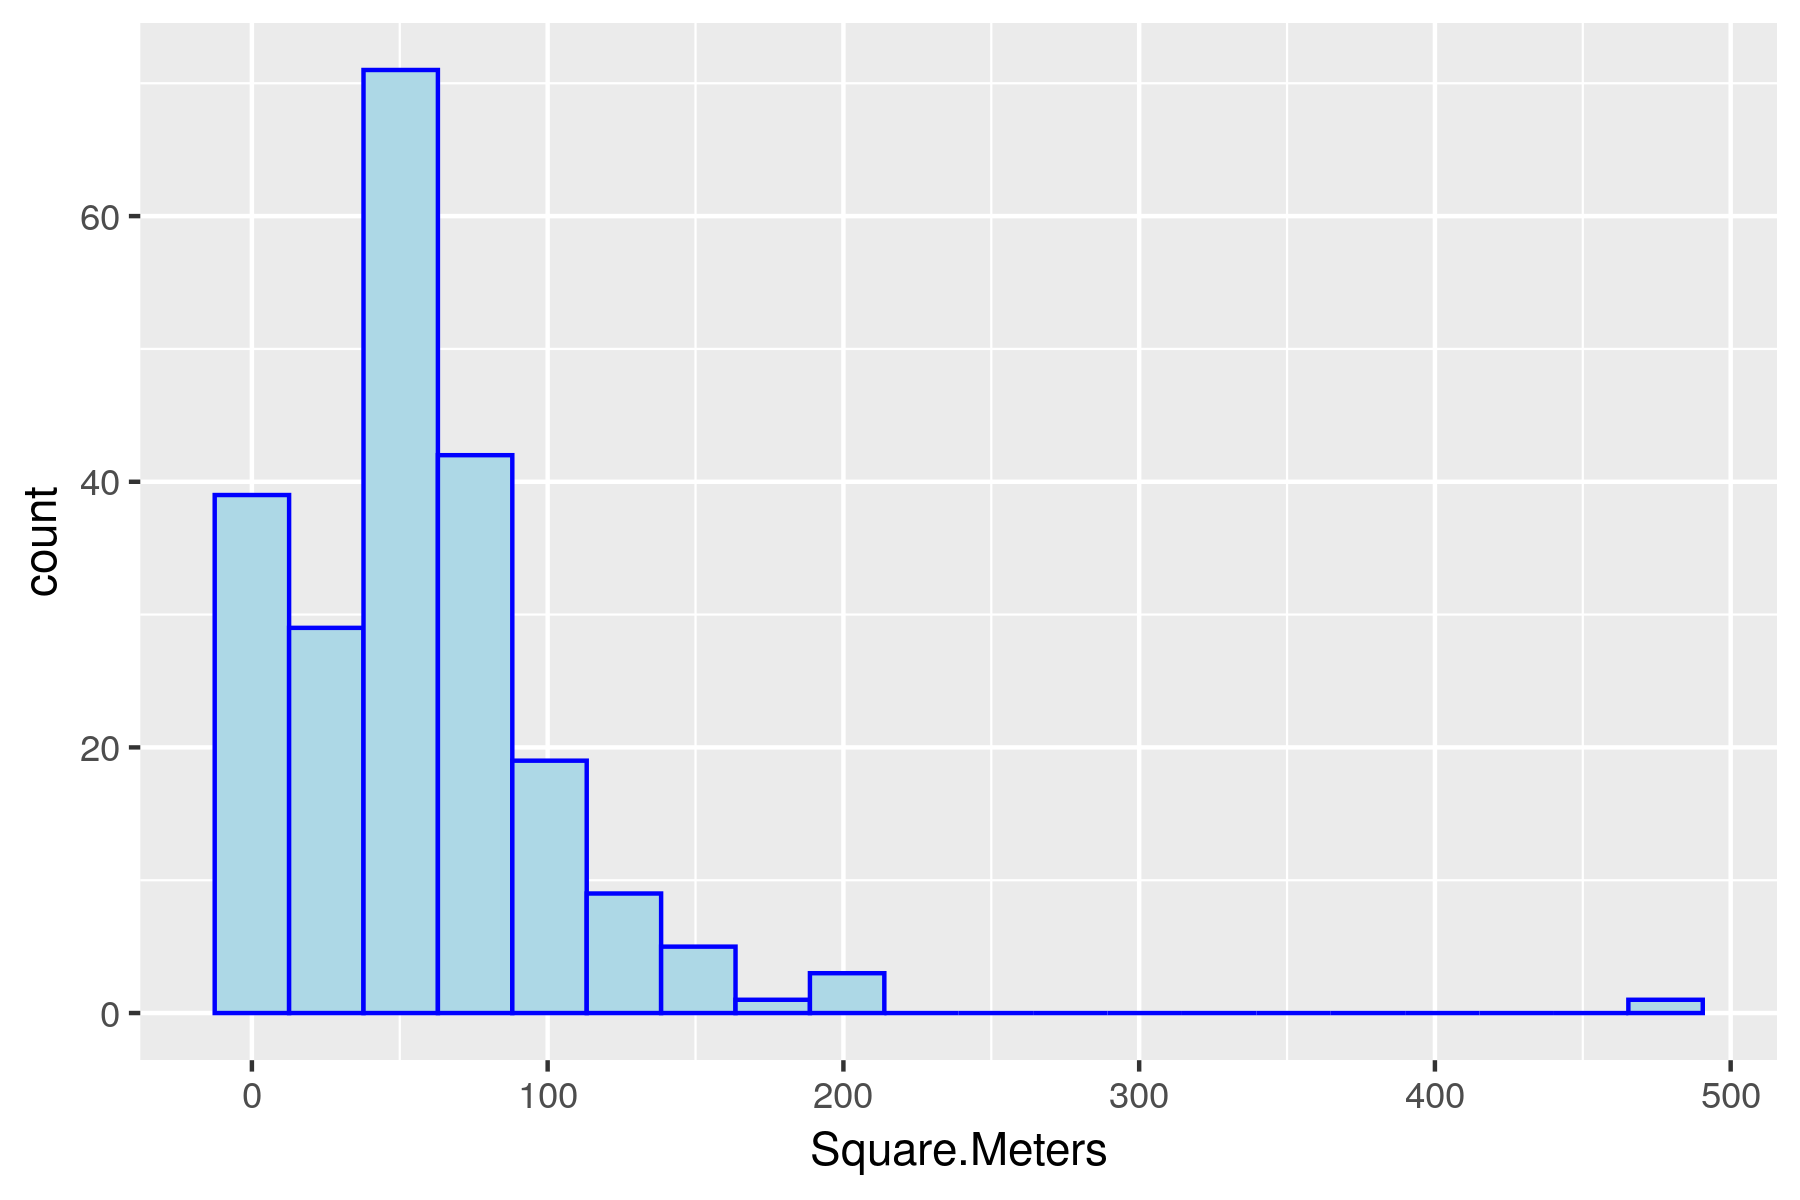

In [8]:
library(ggplot2)
ggplot(data=df_madrid ,aes(x=Square.Meters))+geom_histogram(bins=20, color="blue", fill="lightblue")

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [9]:
length(which(df_madrid$Square.Meters < 20))
df_madrid$Square.Meters[df_madrid$Square.Meters < 20] <- NA

[1] 45

In [10]:
length(which(df_madrid$Square.Meters < 20))

[1] 0

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [11]:
#df_madrid %>% group_by(Neighbourhood) %>% summarize(sum(is.na(Square.Meters)), num=n())

In [12]:
df_madrid <- df_madrid %>% group_by(Neighbourhood) %>% filter(!all(is.na(Square.Meters)))
#df_madrid %>% group_by(Neighbourhood) %>% summarize(sum(is.na(Square.Meters)), num=n())

In [13]:
print("Con el histograma que hemos pintado anteriormente, vemos que entre los 200, hasta > 450 metros cuadrados, no hay ningún apartamento. Podríamos considerar el mismo como un outlier, que afecte nuestro modelo de predicción. Vemos que se trata únicamente de un apartamento. Dicho apartamento está en la posición:")
which(df_madrid$Square.Meters > 450)
df_madrid[3957,]
#df_madrid<-df_madrid[-c(3957), ]

[1] "Con el histograma que hemos pintado anteriormente, vemos que entre los 200, hasta > 450 metros cuadrados, no hay ningún apartamento. Podríamos considerar el mismo como un outlier, que afecte nuestro modelo de predicción. Vemos que se trata únicamente de un apartamento. Dicho apartamento está en la posición:"


[1] 3957

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Jerónimos,16,5,5,13,365,5167,5,37,98,40.41826,-3.690208,480.0298


In [14]:
#which(df_madrid$Square.Meters > 450)
#df_madrid

In [15]:
print("Nos quedamos nuestro dataframe, sin este outlier. Volvemos a pintar el histograma sin el mismo.")
df_madrid$Square.Meters[df_madrid$Square.Meters > 450] <- NA

[1] "Nos quedamos nuestro dataframe, sin este outlier. Volvemos a pintar el histograma sin el mismo."


Warning message:
“Removed 4728 rows containing non-finite values (stat_bin).”


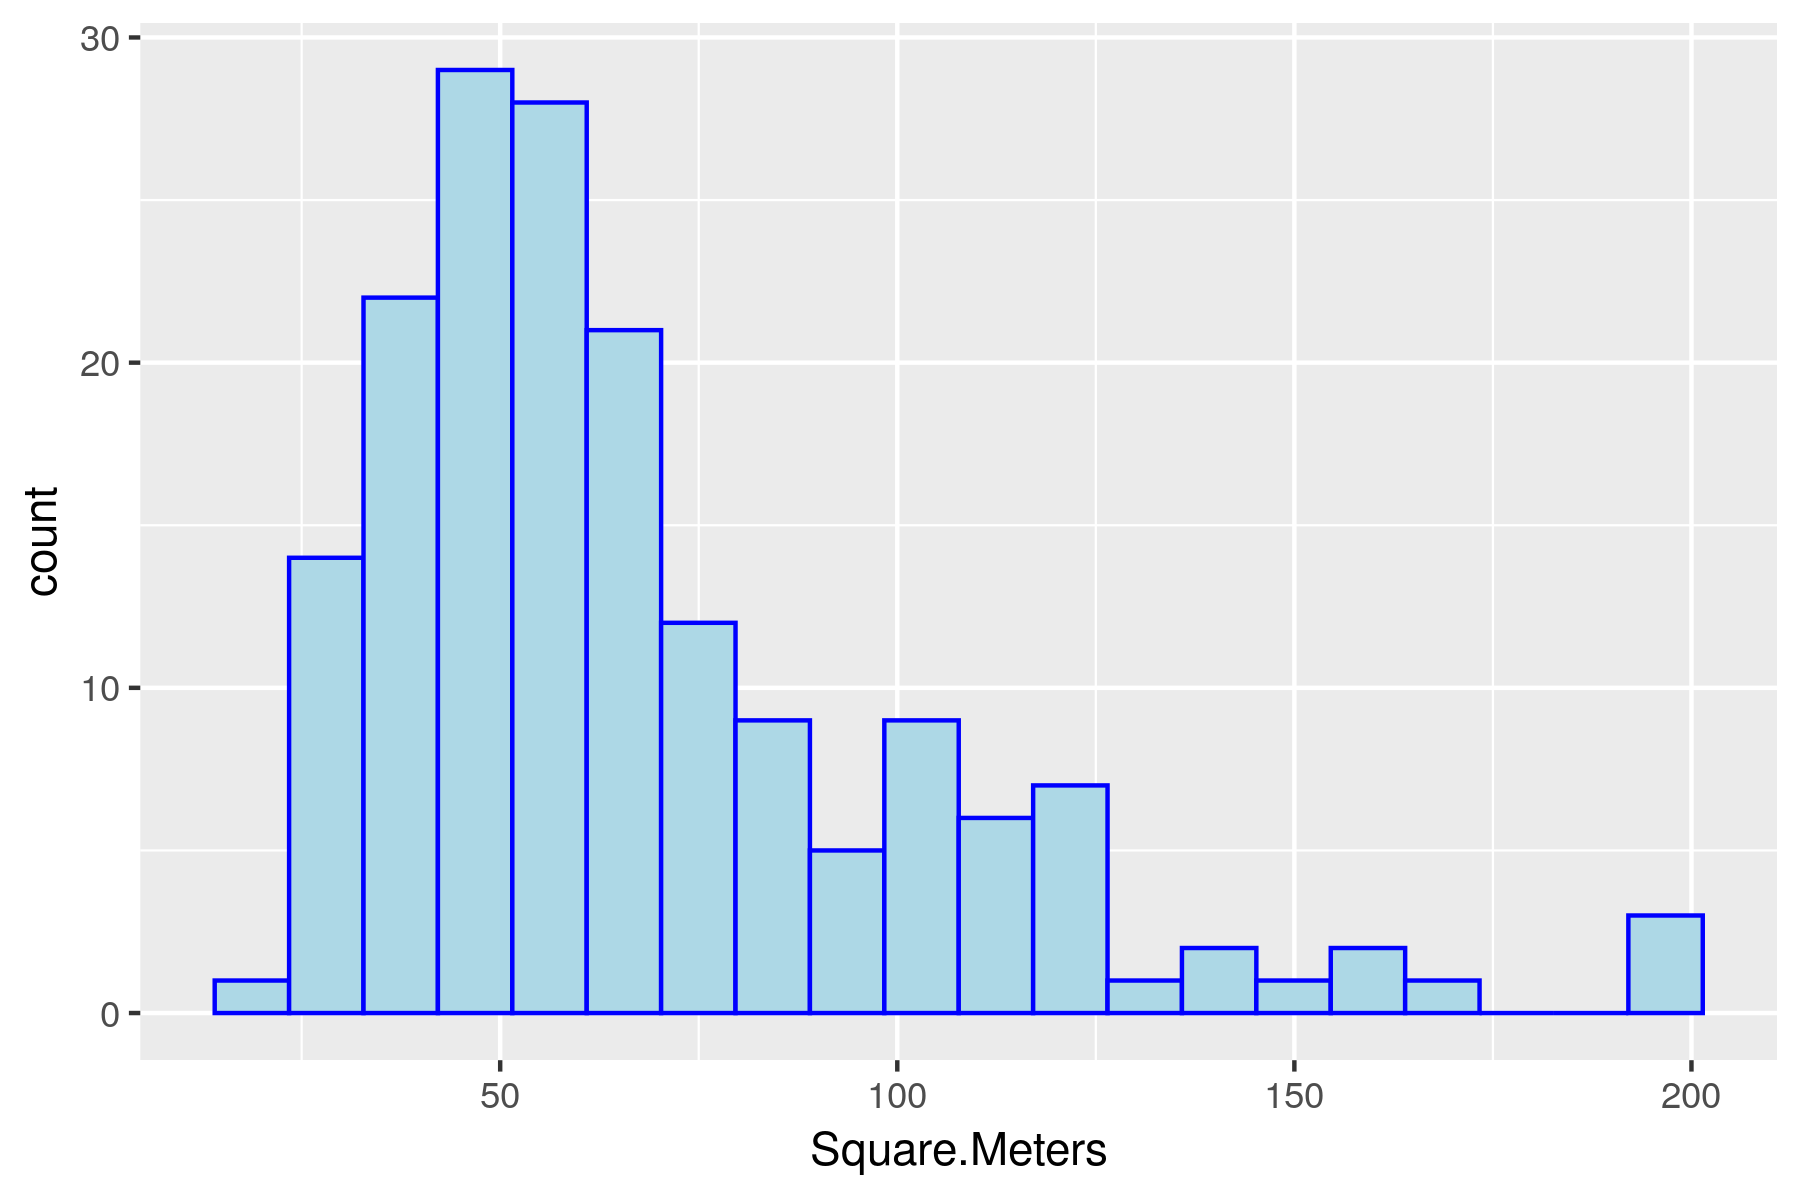

In [16]:
ggplot(data=df_madrid ,aes(x=Square.Meters))+geom_histogram(bins=20, color="blue", fill="lightblue")

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




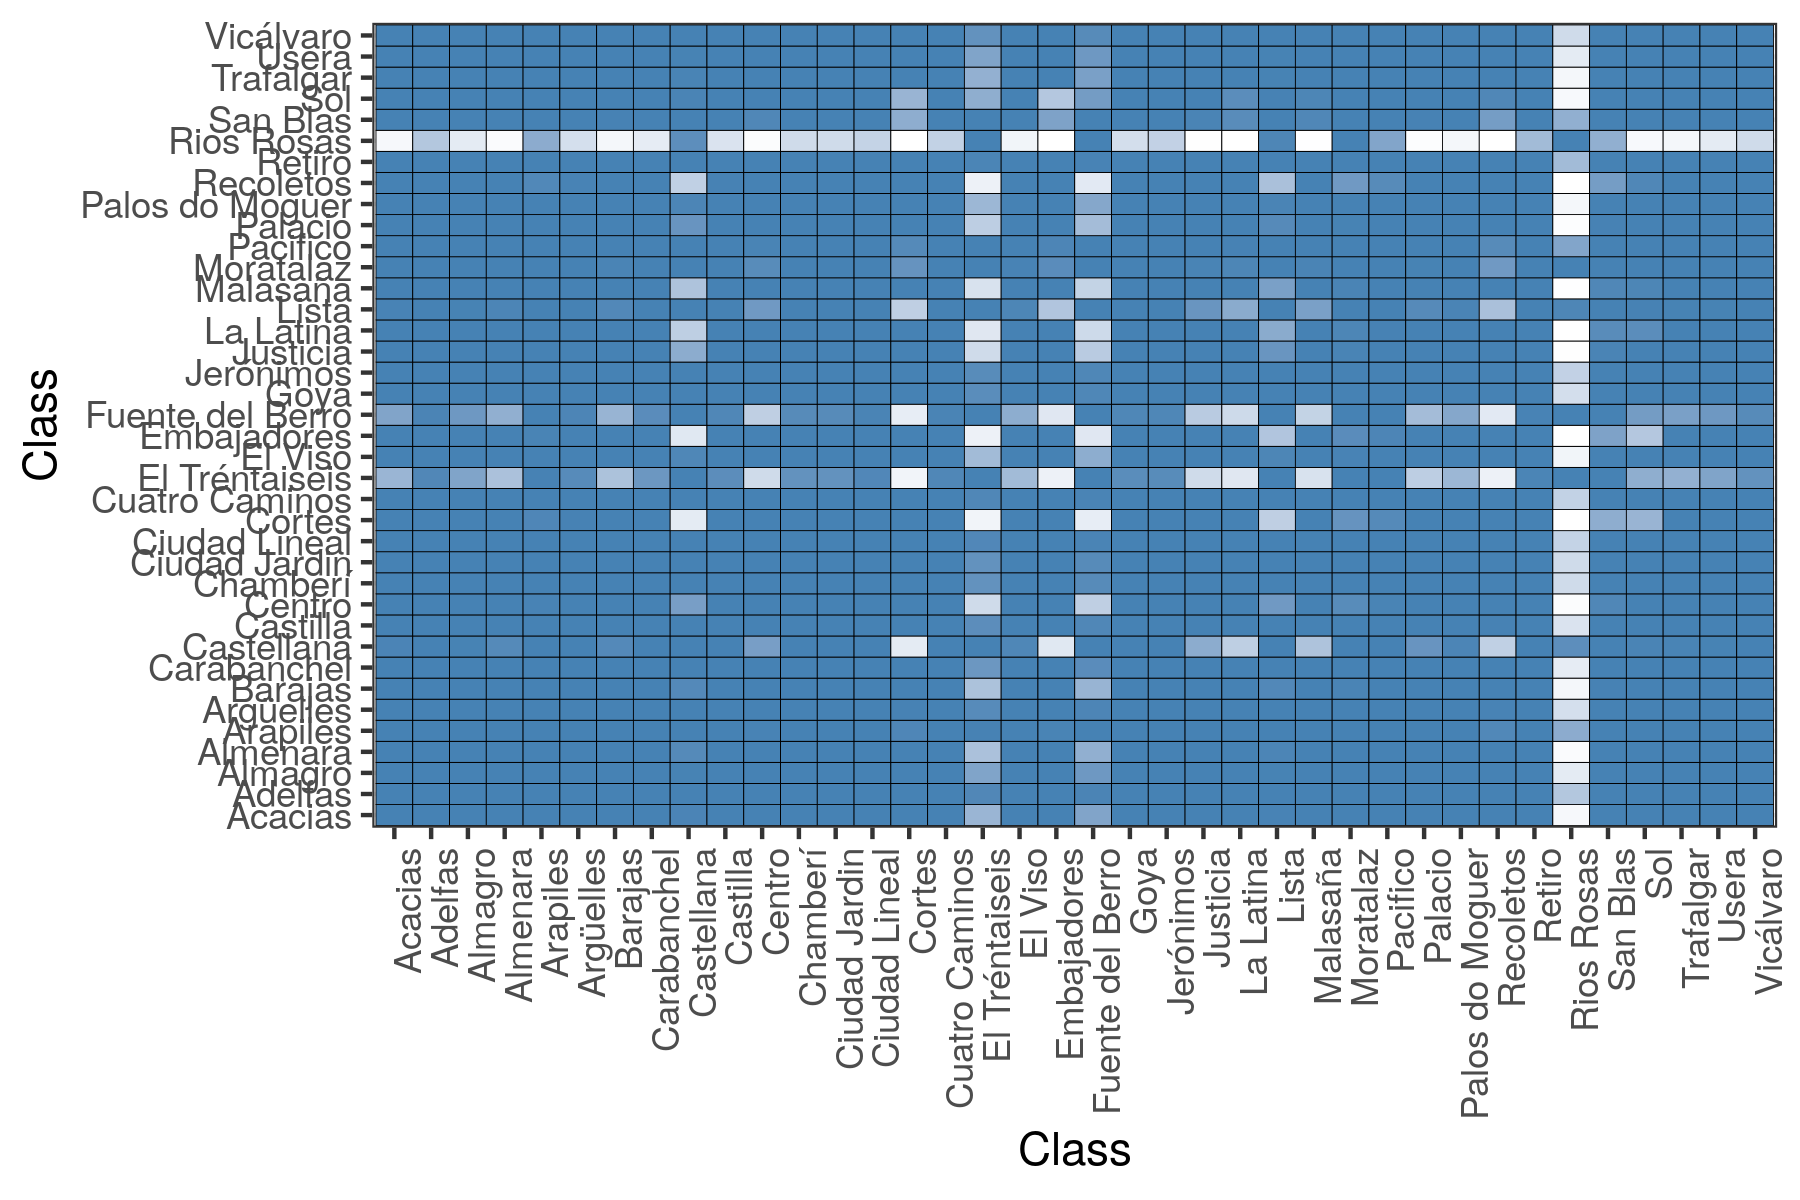

In [17]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [18]:
df_madrid.dist<- as.dist(1 - resm)
str(df_madrid.dist)

 'dist' num [1:703] 0 0 0 0 0 0 0 0.0211 0 0 ...
 - attr(*, "Labels")= chr [1:38] "Acacias" "Adelfas" "Almagro" "Almenara" ...
 - attr(*, "Size")= int 38
 - attr(*, "call")= language as.dist.default(m = 1 - resm)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


In [19]:
#agnes(df_madrid.dist, method = "complete")
df_madrid.tree <- hclust(df_madrid.dist, method="complete")
df_madrid.dend <- as.dendrogram(df_madrid.tree) 
#aggregate(Square.Meters~Neighbourhood, df_madrid, mean)
#plot(df_madrid.dend)
#df_madrid.dend


---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




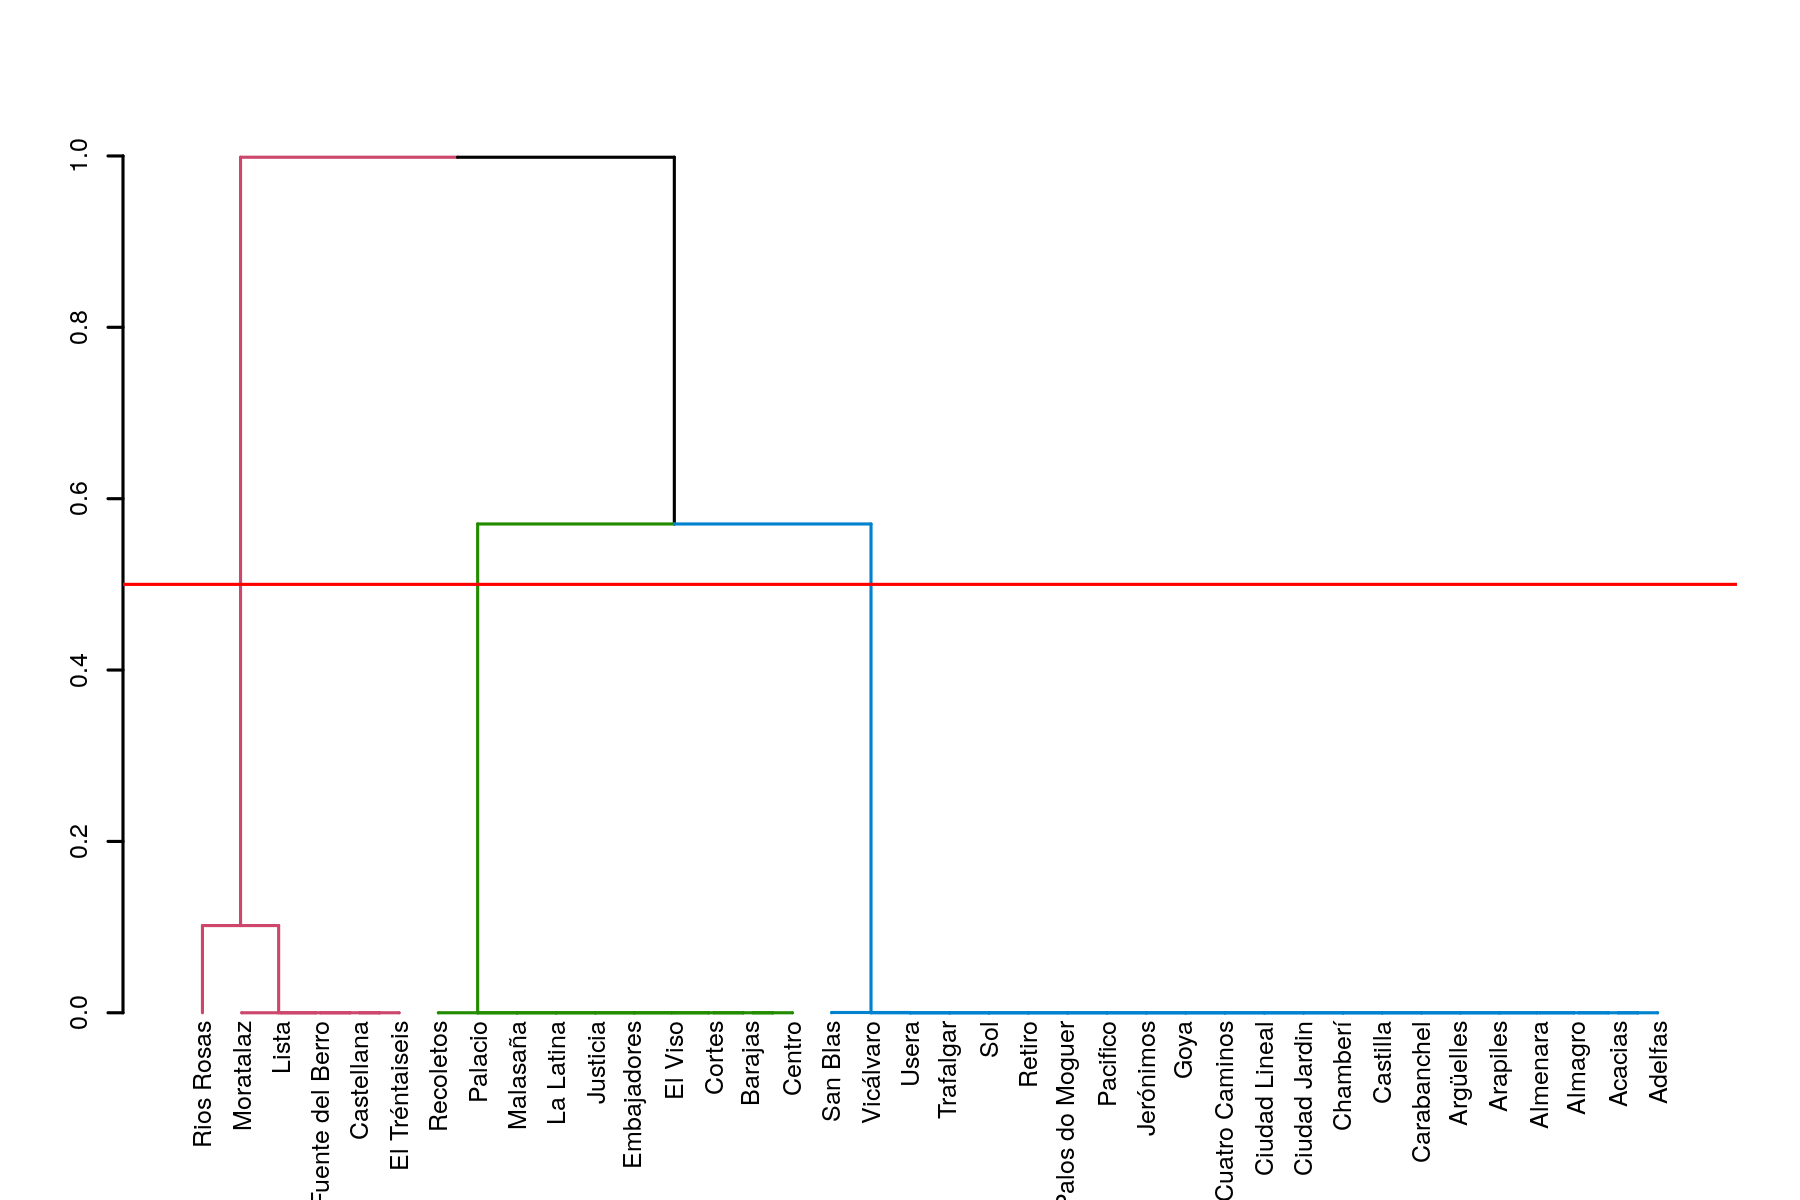

In [20]:
library(dendextend)
par(cex=0.5)
plot(color_branches(df_madrid.dend, k=3),leaflab="perpendicular")
abline(h=0.5,col="red")

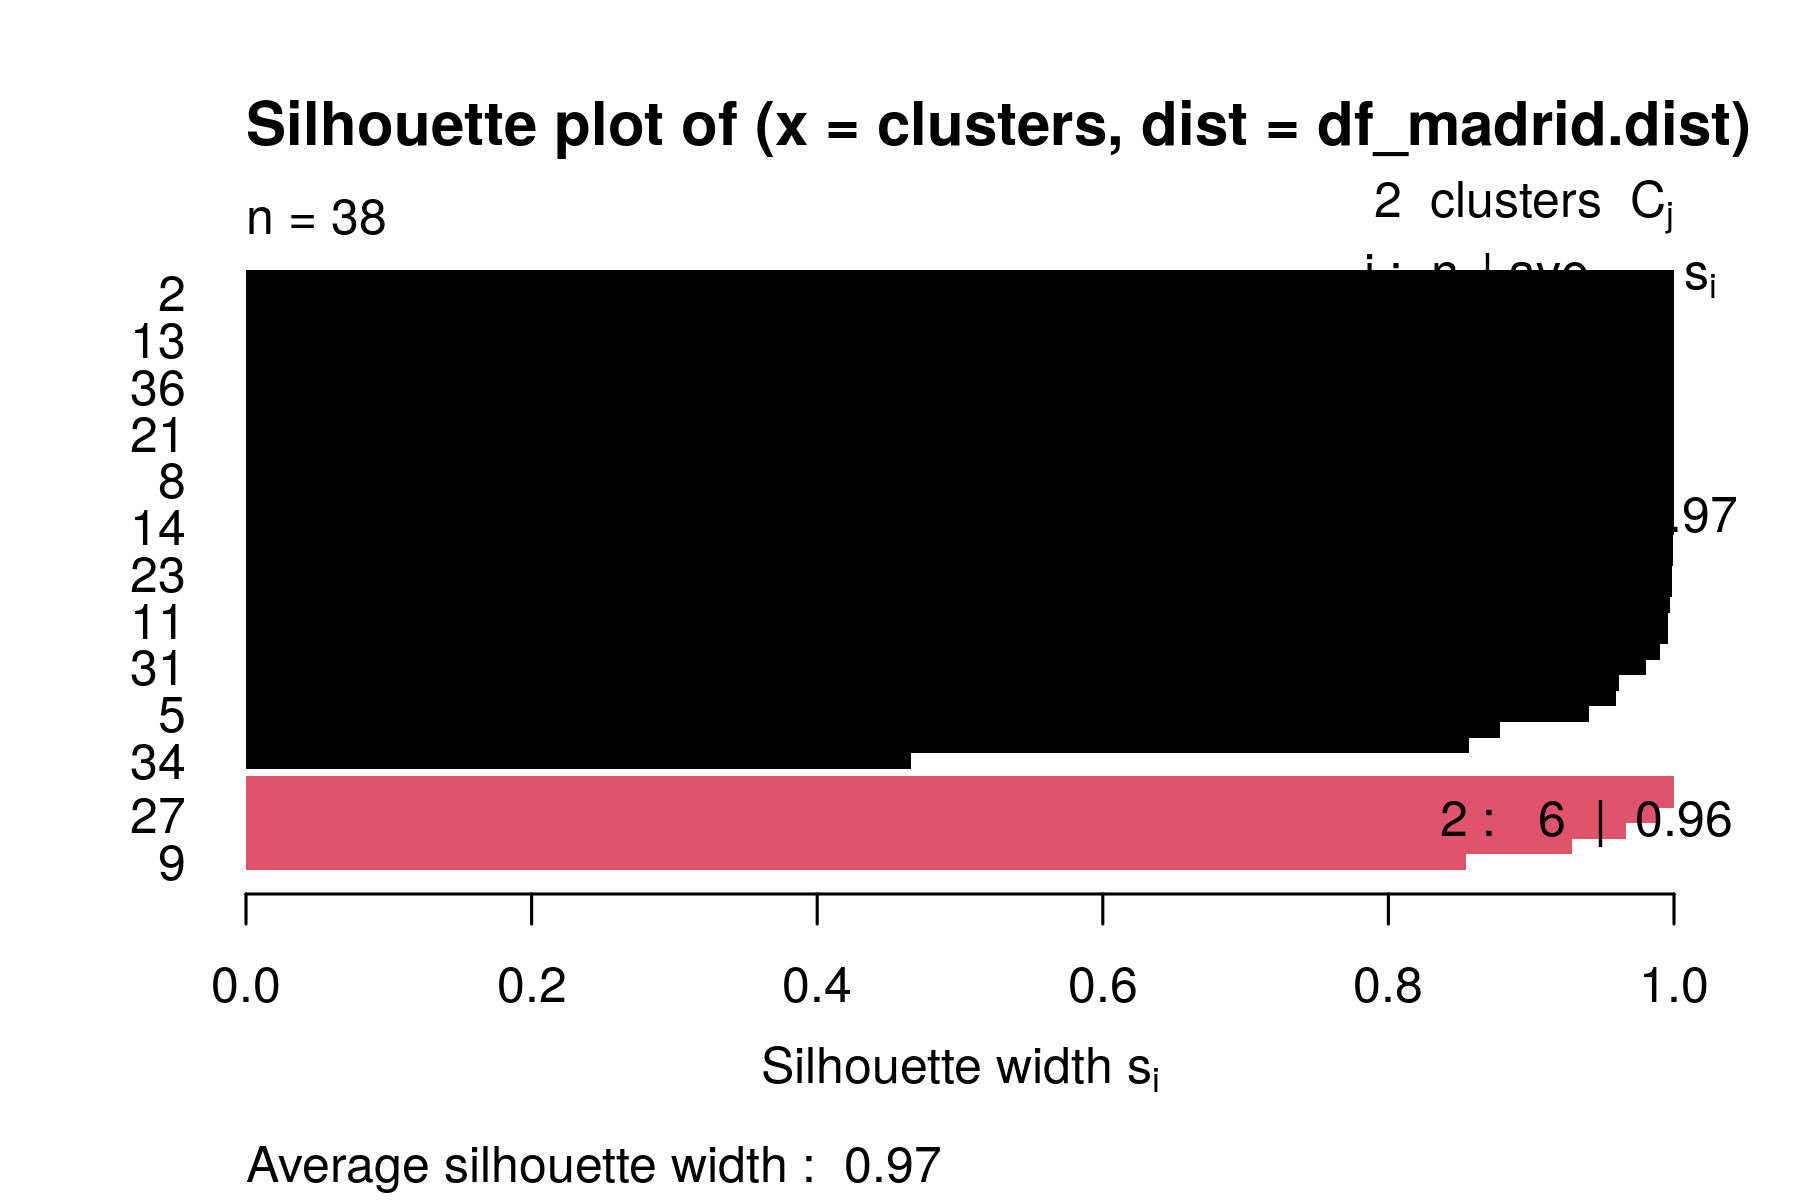

In [21]:
library(cluster)
clusters <- cutree(df_madrid.dend, k=2)
ss<-silhouette(clusters, df_madrid.dist)
plot(ss,col=1:max(clusters),border=NA)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [22]:
print("Es cierto que viendo el silhouette, arroja un mejor resultado con 2 que con 3 o + clústers. Pero analizando el dendograma, lo ideal, considero que sería realizar el corte entre 0.2 y  0.5. De esta manera, tenemos 3 clústers")

[1] "Es cierto que viendo el silhouette, arroja un mejor resultado con 2 que con 3 o + clústers. Pero analizando el dendograma, lo ideal, considero que sería realizar el corte entre 0.2 y  0.5. De esta manera, tenemos 3 clústers"



 1  2  3 
22 10  6 

Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               1                1                2                1 
      Castellana         Castilla           Centro         Chamberí 
               3                1                2                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                2                1 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               3                2                2                3 
            Goya        Jerónimos         Justicia        La Latina 
               1                1                2                2 
           Lista         Malasaña        Moratalaz         Pacifico 
               3                2                3                1 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               2                1                2                1 
      Rios Rosas         San Blas              Sol        Trafalgar 
               3                1                1                1 
           Usera        Vicálvaro 
               1                1

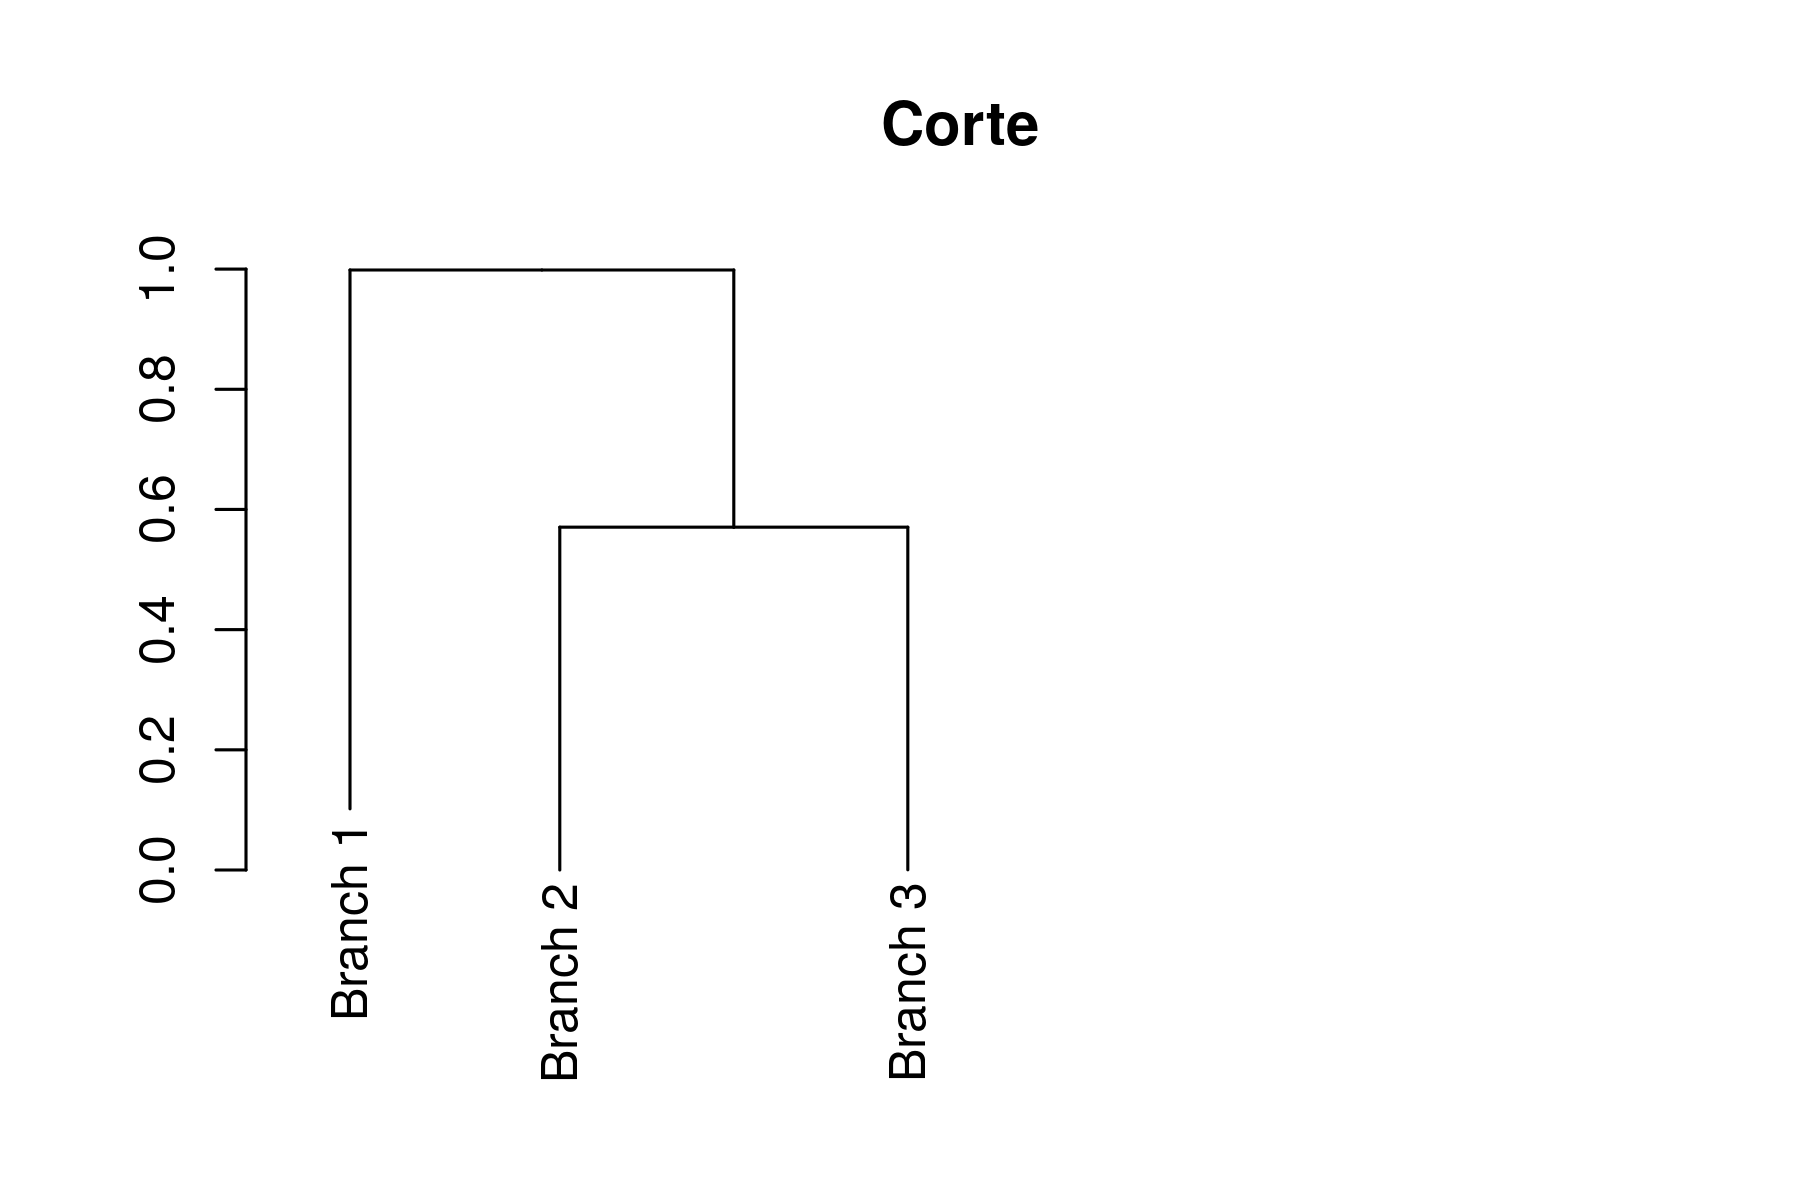

In [23]:
plot(cut(df_madrid.dend, h = 0.4)$upper, main = "Corte", cex=1)
table(cutree_1h.dendrogram(df_madrid.dend,h=0.5))
cutree(df_madrid.tree,h=0.5)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [24]:
cluster<-factor(c(cutree_1h.dendrogram(df_madrid.dend,h=0.4)))
cluster['Moratalaz']

Moratalaz 
        3 
Levels: 1 2 3

In [25]:
df_madrid$neighb_id <- cluster[df_madrid$Neighbourhood]
head(df_madrid)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA,2
Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA,2
Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA,2
La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA,2
Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA,2
Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,NA,2


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 14 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 7 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 8 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 5 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 692 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4728 rows containing missing values”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing non-finite values (stat_d

Warning message:
“Removed 692 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 692 rows containing missing values (geom_point).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4728 rows containing missing values”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 692 rows containing missing values (geom_point).”
Warning message in ggally_statistic(data =

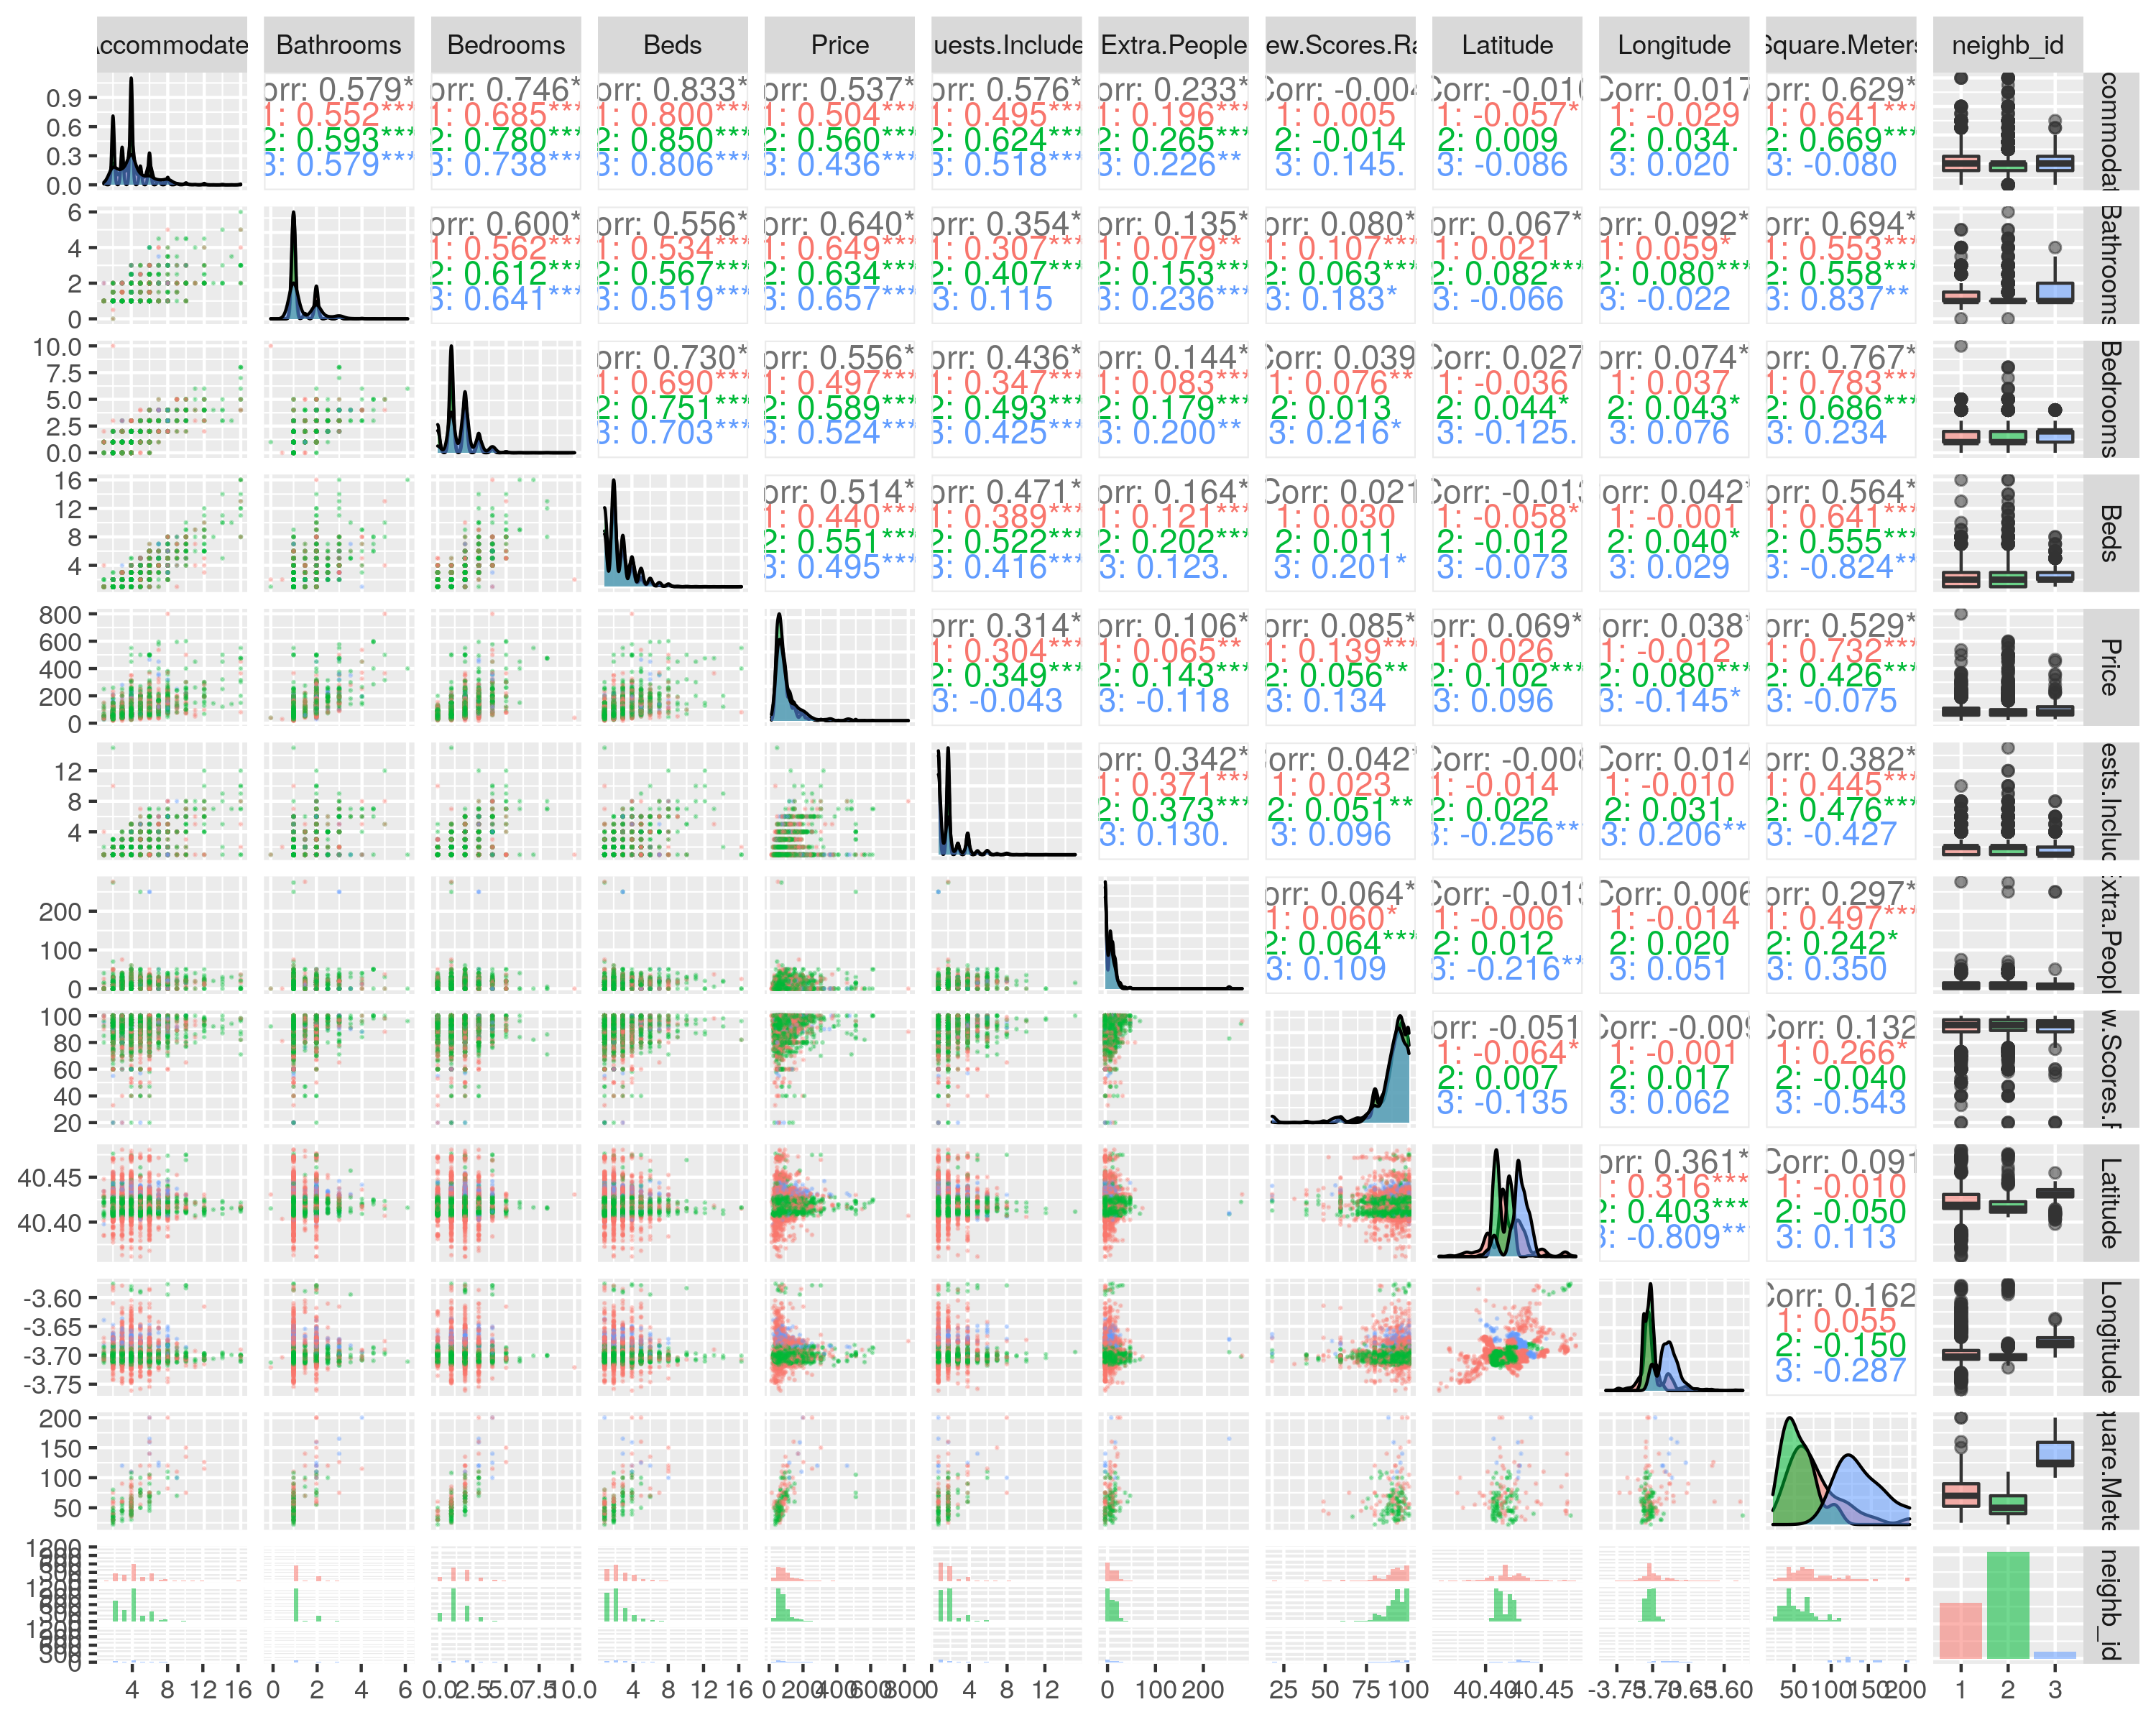

In [26]:
library(GGally)
library(ggplot2)
options(repr.plot.height=8,repr.plot.width=10)
ggpairs(df_madrid[,c("Accommodates","Bathrooms","Bedrooms","Beds","Price","Guests.Included","Extra.People", "Review.Scores.Rating", "Latitude", "Longitude" ,"Square.Meters", "neighb_id")],
        ggplot2::aes(colour=neighb_id, alpha=0.5),
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1)))   
       

In [27]:
set.seed(40)
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.70)
df_madrid_train <- df_madrid[idx,]
df_madrid_test <- df_madrid[-idx,]

In [28]:
model <- lm(df_madrid_train, formula = Square.Meters ~ log(Bathrooms)+  Bedrooms:neighb_id + Price + Extra.People)
summary(model)


Call:
lm(formula = Square.Meters ~ log(Bathrooms) + Bedrooms:neighb_id + 
    Price + Extra.People, data = df_madrid_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.656 -10.399   0.052   8.517  45.068 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         32.81560    3.53730   9.277 1.25e-15 ***
log(Bathrooms)      29.57537    6.51258   4.541 1.39e-05 ***
Price                0.04231    0.02733   1.548 0.124390    
Extra.People         0.44377    0.18976   2.339 0.021083 *  
Bedrooms:neighb_id1 16.56370    2.31552   7.153 8.45e-11 ***
Bedrooms:neighb_id2  9.76656    2.47391   3.948 0.000136 ***
Bedrooms:neighb_id3 18.83768    2.83670   6.641 1.08e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.25 on 115 degrees of freedom
  (3308 observations deleted due to missingness)
Multiple R-squared:  0.7724,	Adjusted R-squared:  0.7605 
F-statistic: 65.03 on 6 and 115 DF,  p-value: 

Warning message:
“Removed 3308 rows containing missing values (geom_point).”
Warning message:
“Removed 1424 rows containing missing values (geom_point).”


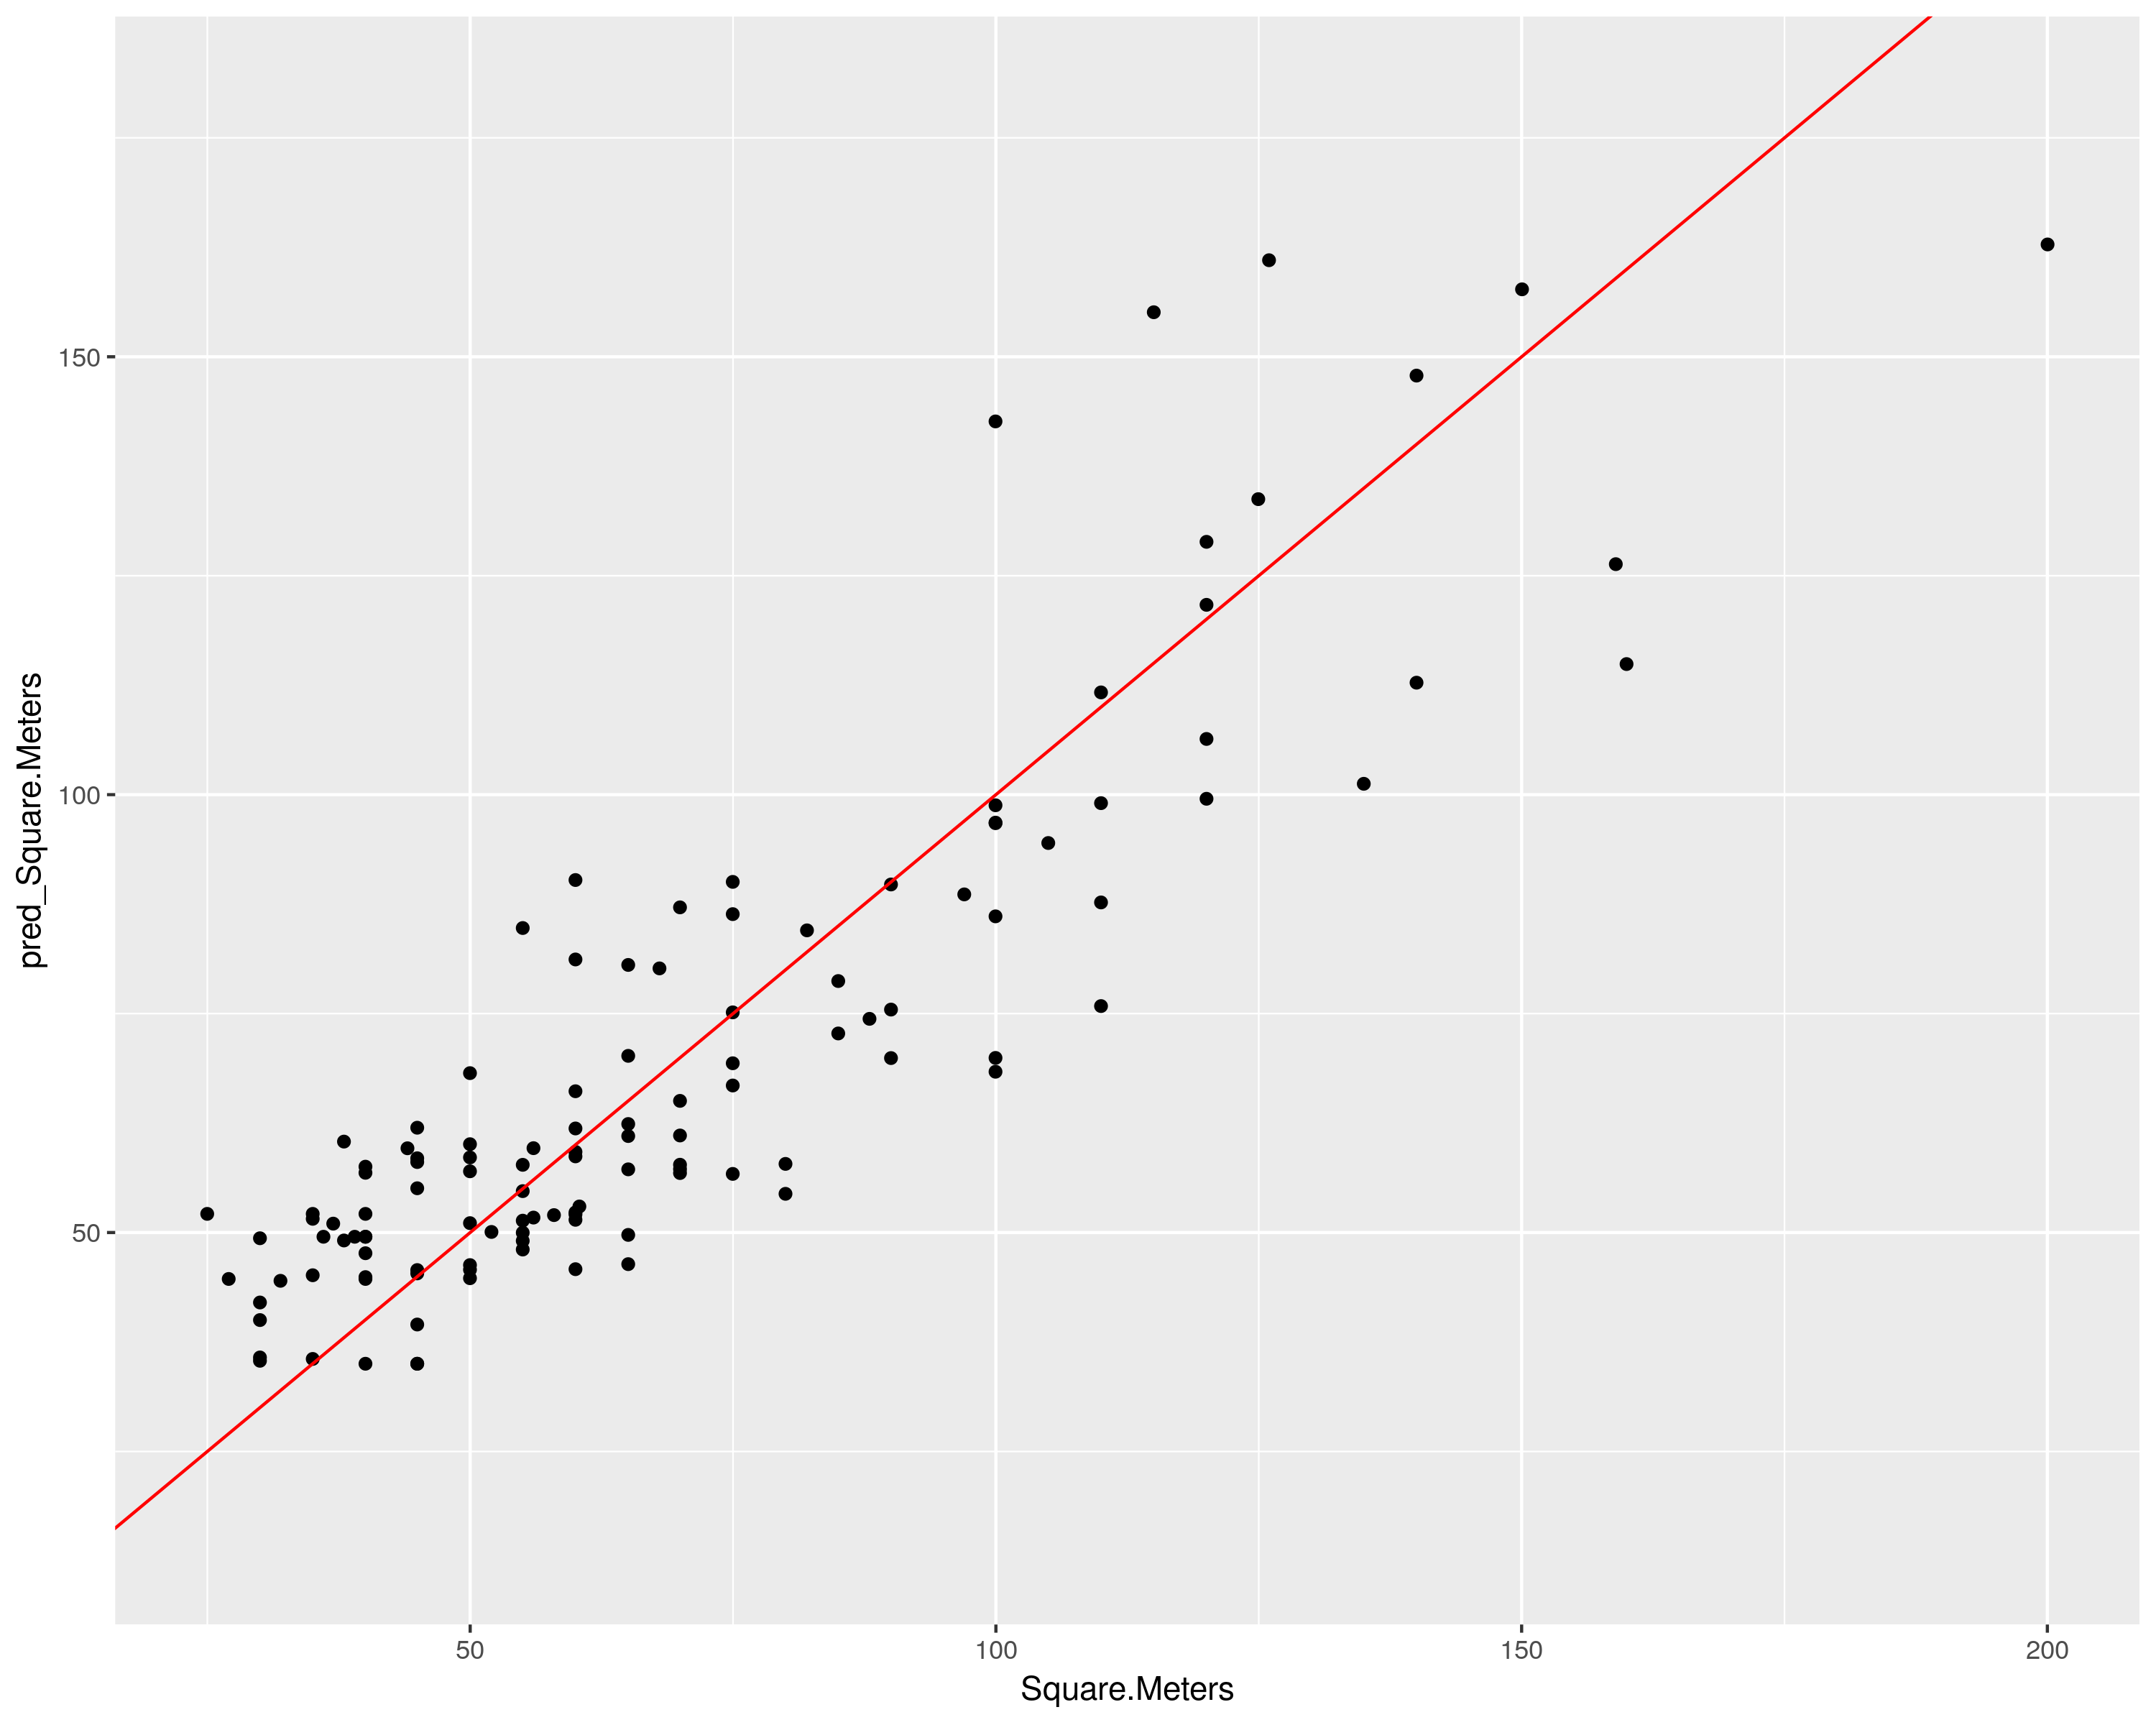

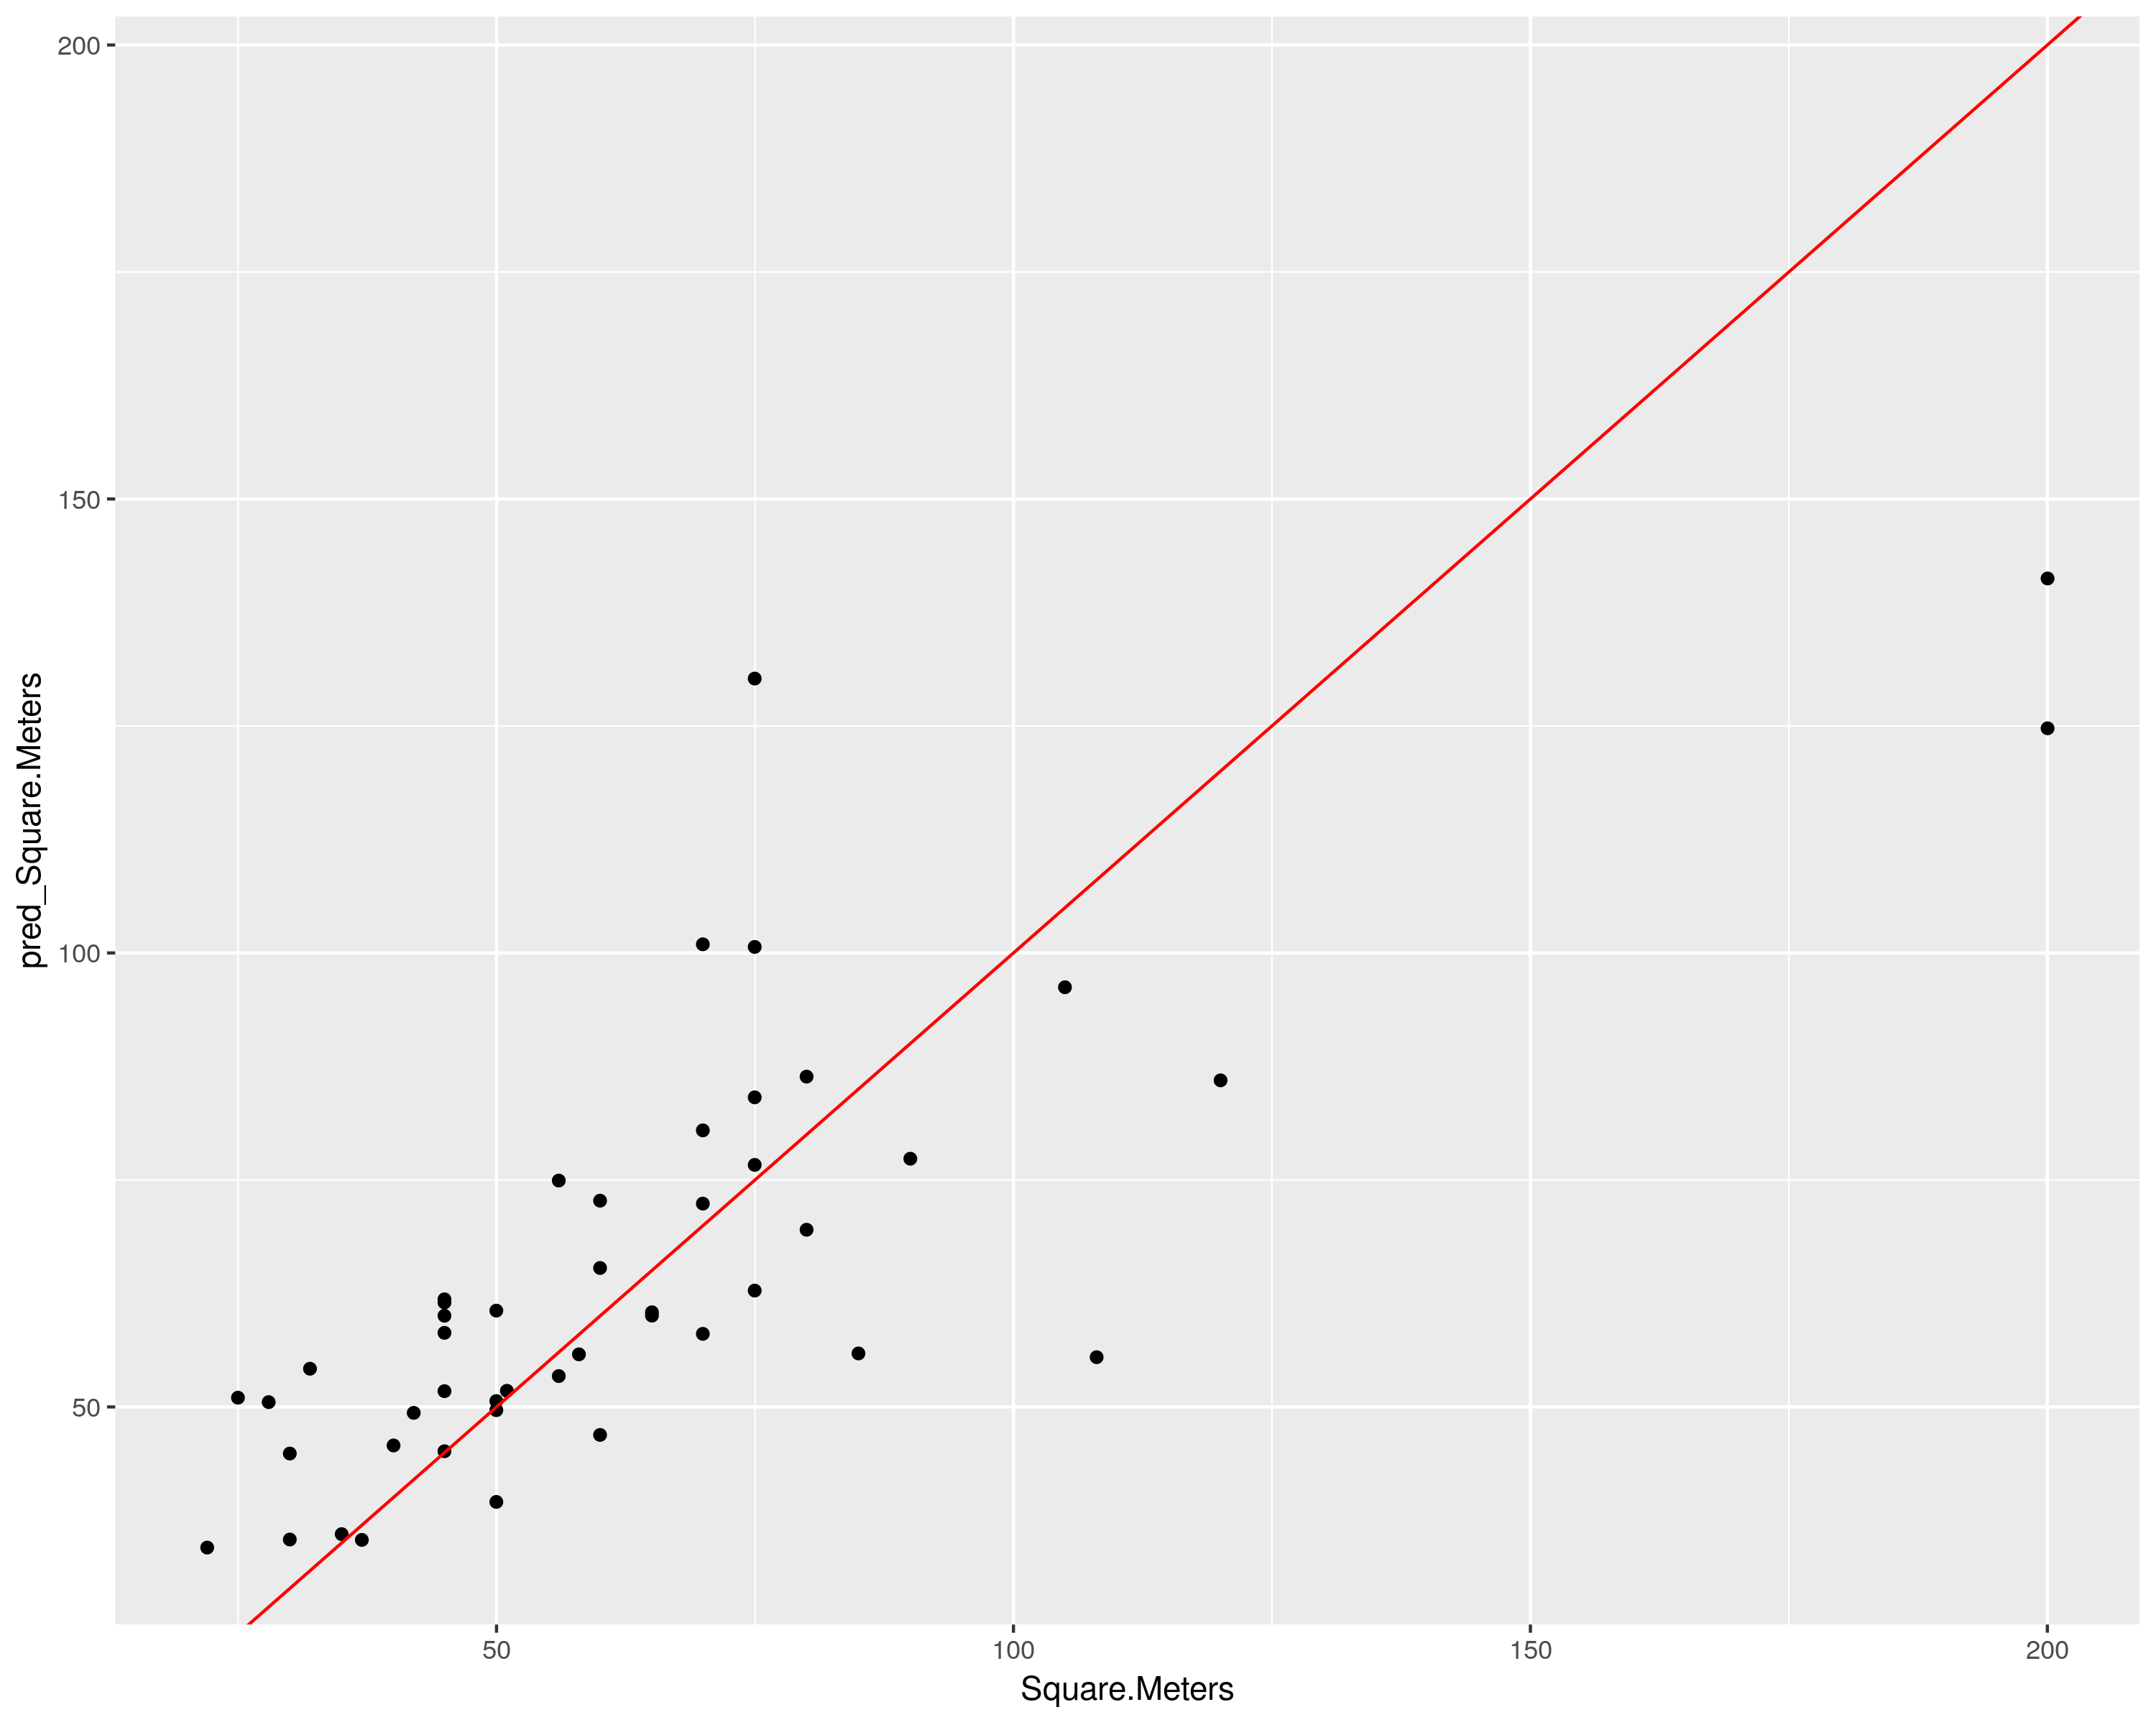

In [29]:
df_madrid_train$pred_Square.Meters <- predict(model, df_madrid_train)
ggplot(df_madrid_train, aes(x=Square.Meters, y=pred_Square.Meters))+geom_point()+geom_abline(slope=1, color='red')

df_madrid_test$pred_Square.Meters <-predict(model,df_madrid_test)
ggplot(df_madrid_test, aes(x=Square.Meters, y=pred_Square.Meters))+geom_point()+geom_abline(slope=1, color='red')

In [30]:
df_madrid_train_clean <- na.omit(df_madrid_train[,c("pred_Square.Meters", "Square.Meters")])
df_madrid_test_clean <- na.omit(df_madrid_test[,c("pred_Square.Meters", "Square.Meters")])
caret::postResample(pred= df_madrid_train_clean$pred_Square.Meters, obs= df_madrid_train_clean$Square.Meters)
caret::postResample(pred= df_madrid_test_clean$pred_Square.Meters, obs= df_madrid_test_clean$Square.Meters)
print("El RMSE y el R^2 no son exactamente el mismo que el que refleja el summary del modelo. Lo comentamos, y me dijiste que te pusiera un comentario para revisarlo. Gracias!")

RMSE Rsquared      MAE 
15.77488  0.77236 12.33051

RMSE   Rsquared        MAE 
22.4219984  0.6200532 15.3817071

[1] "El RMSE y el R^2 no son exactamente el mismo que el que refleja el summary del modelo. Lo comentamos, y me dijiste que te pusiera un comentario para revisarlo. Gracias!"


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [31]:
df_madrid_train$residuo <- df_madrid_train$Square.Meters - df_madrid_train$pred_Square.Meters
df_madrid_test$residuo <- df_madrid_test$Square.Meters - df_madrid_test$pred_Square.Meters

Warning message:
“Removed 3308 rows containing missing values (geom_point).”


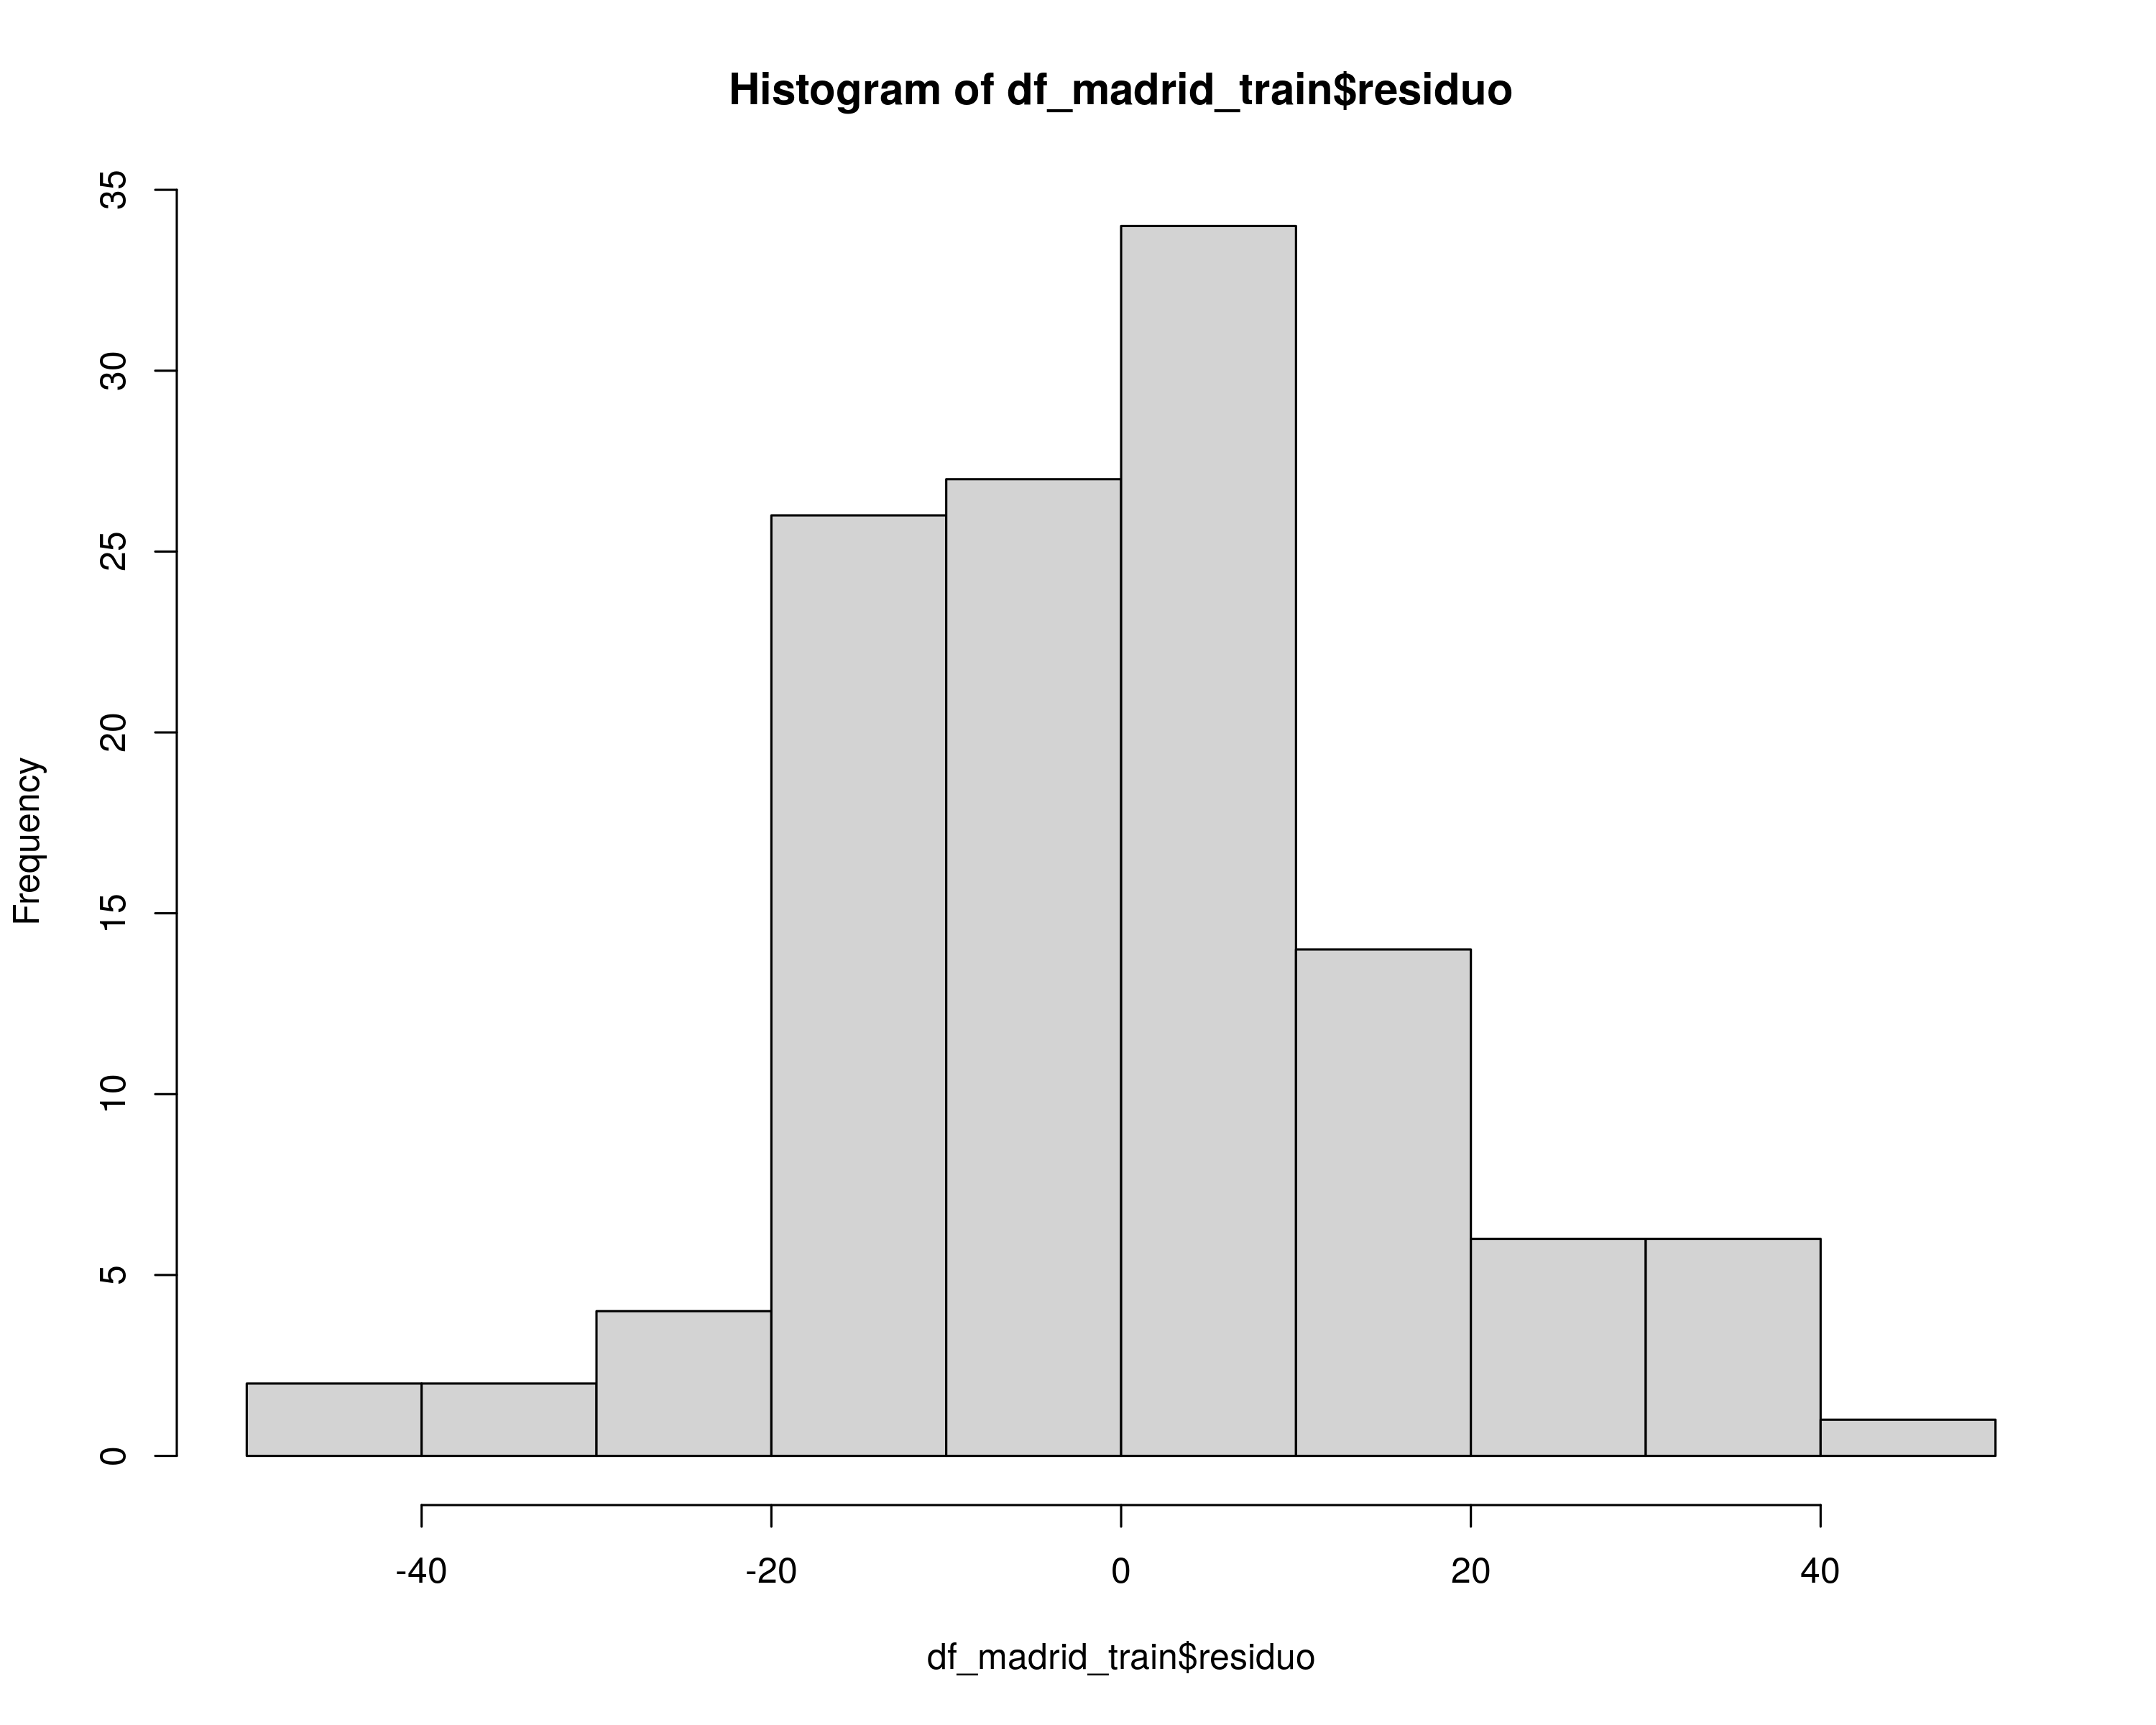

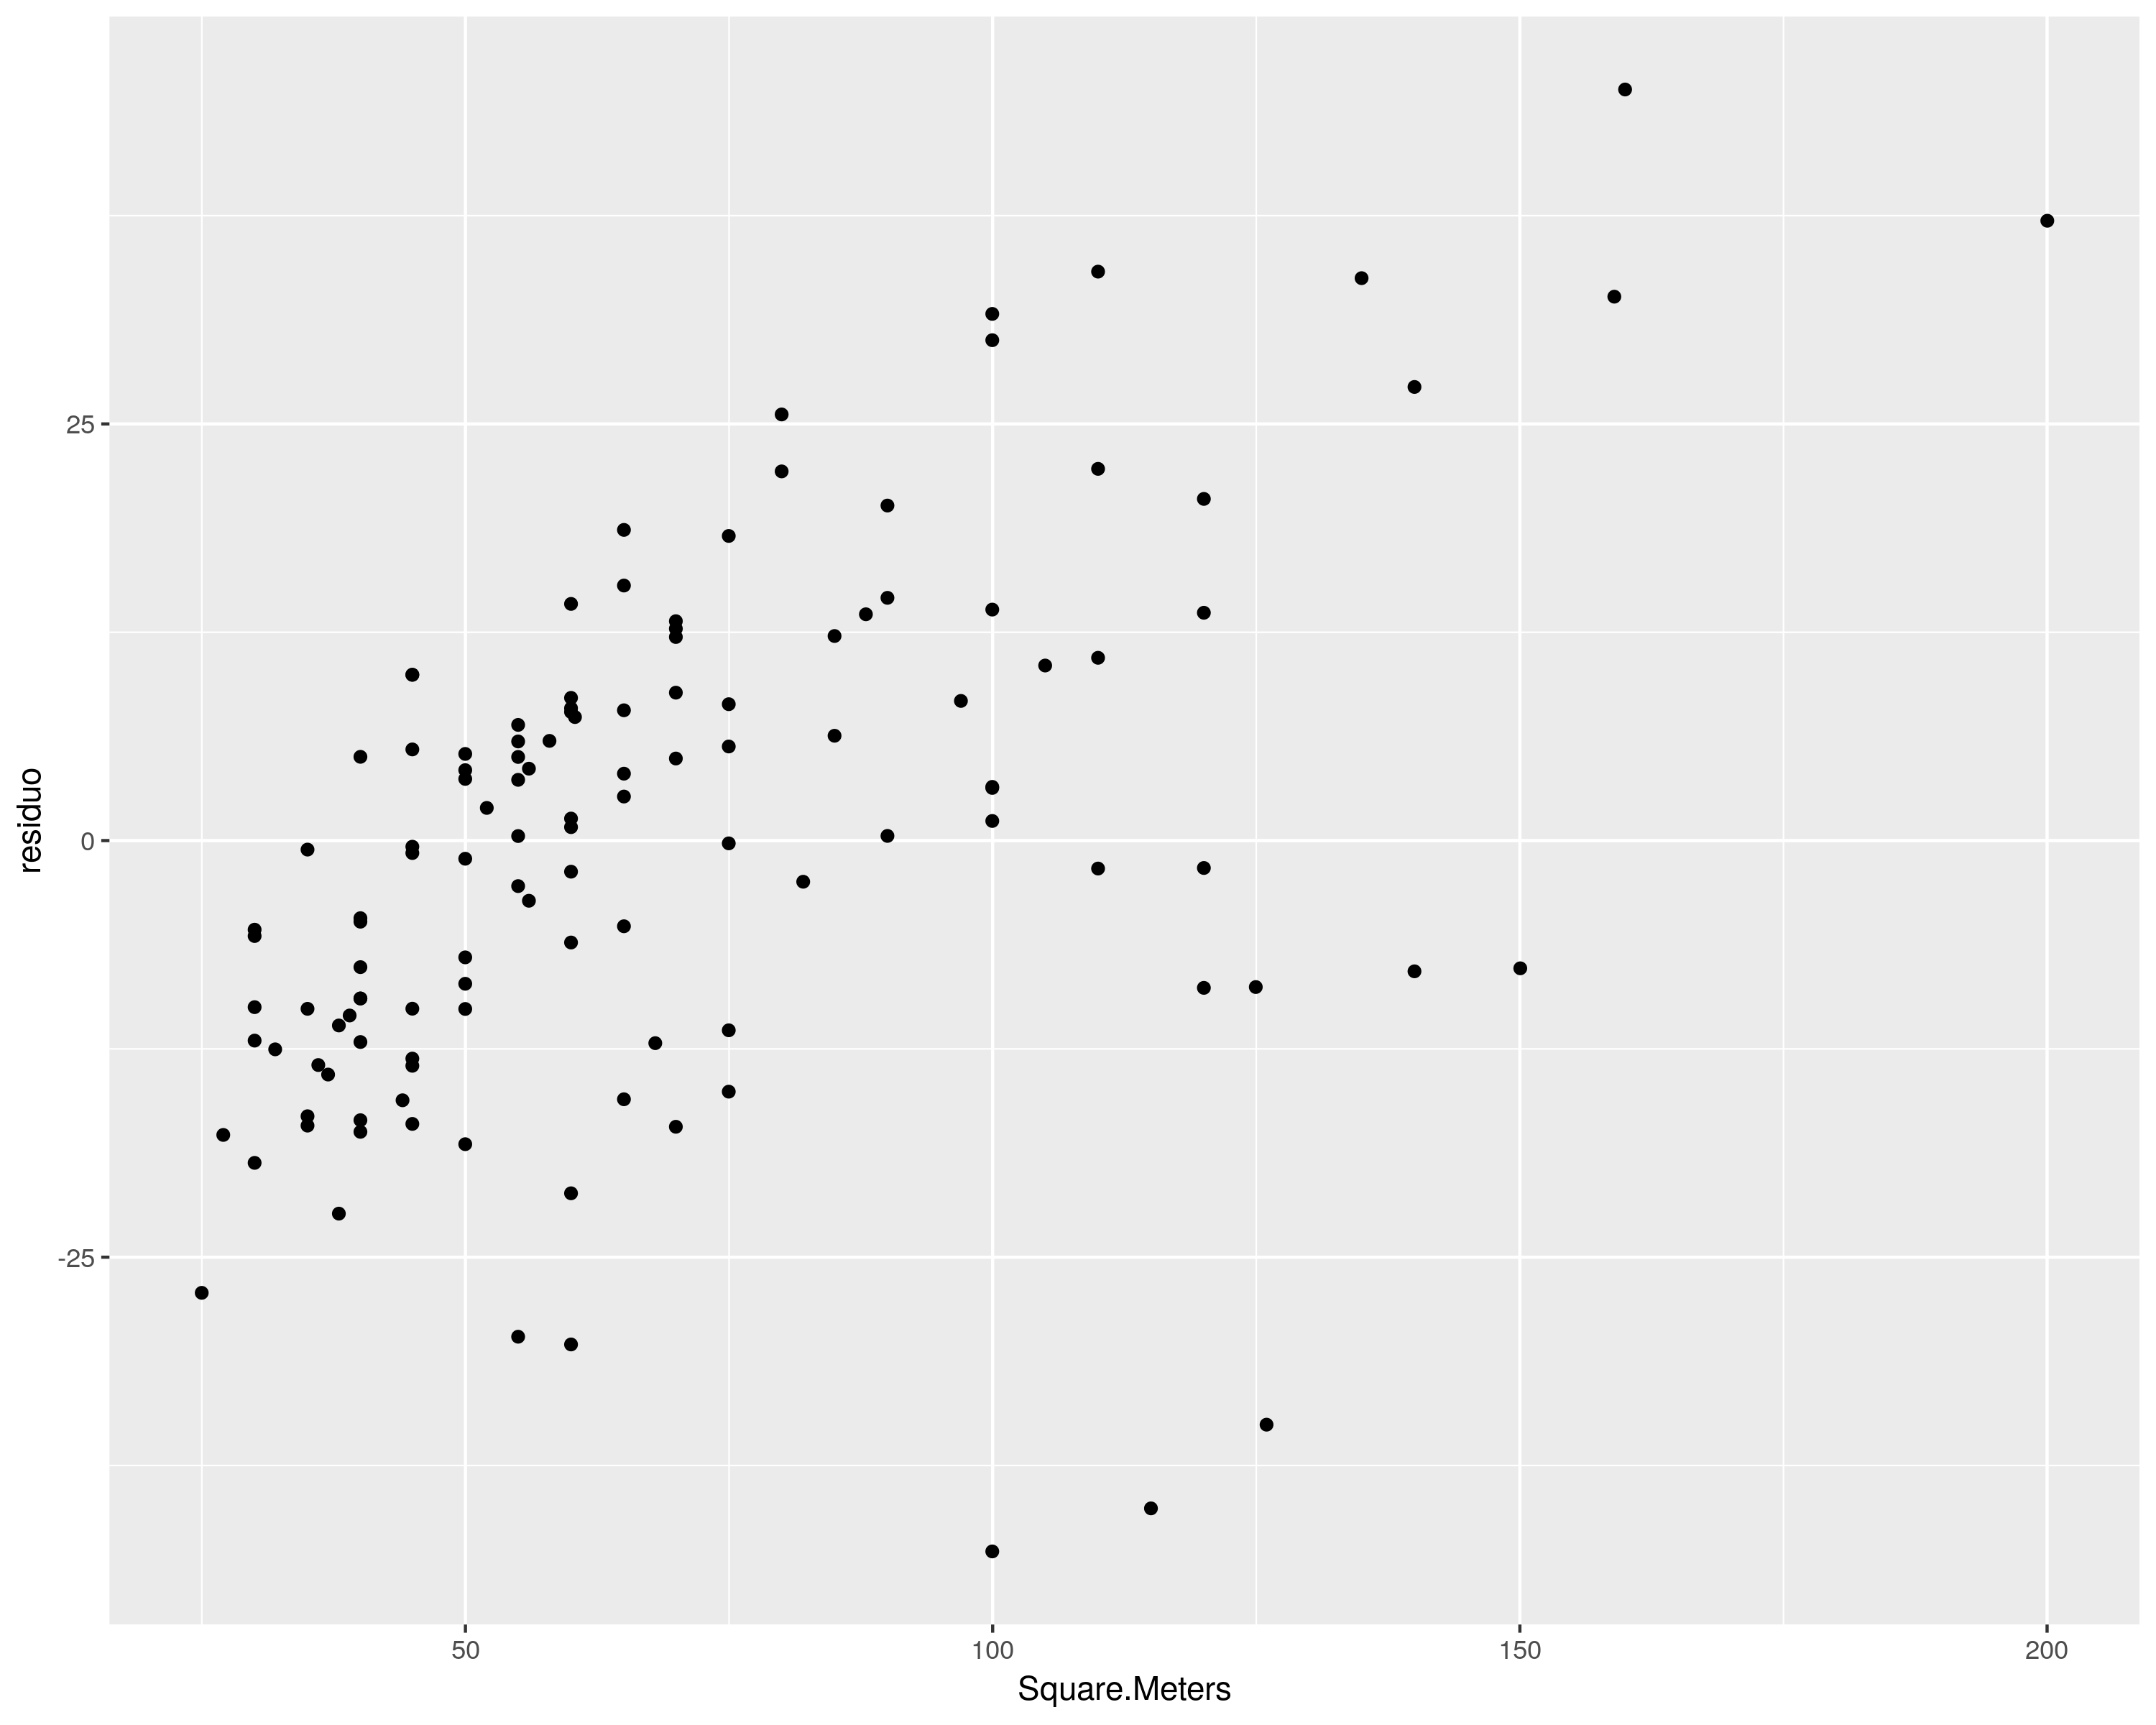

In [32]:
hist(df_madrid_train$residuo,10)
ggplot(df_madrid_train, aes(x=Square.Meters, y=residuo))+geom_point()

Warning message:
“Removed 1424 rows containing missing values (geom_point).”


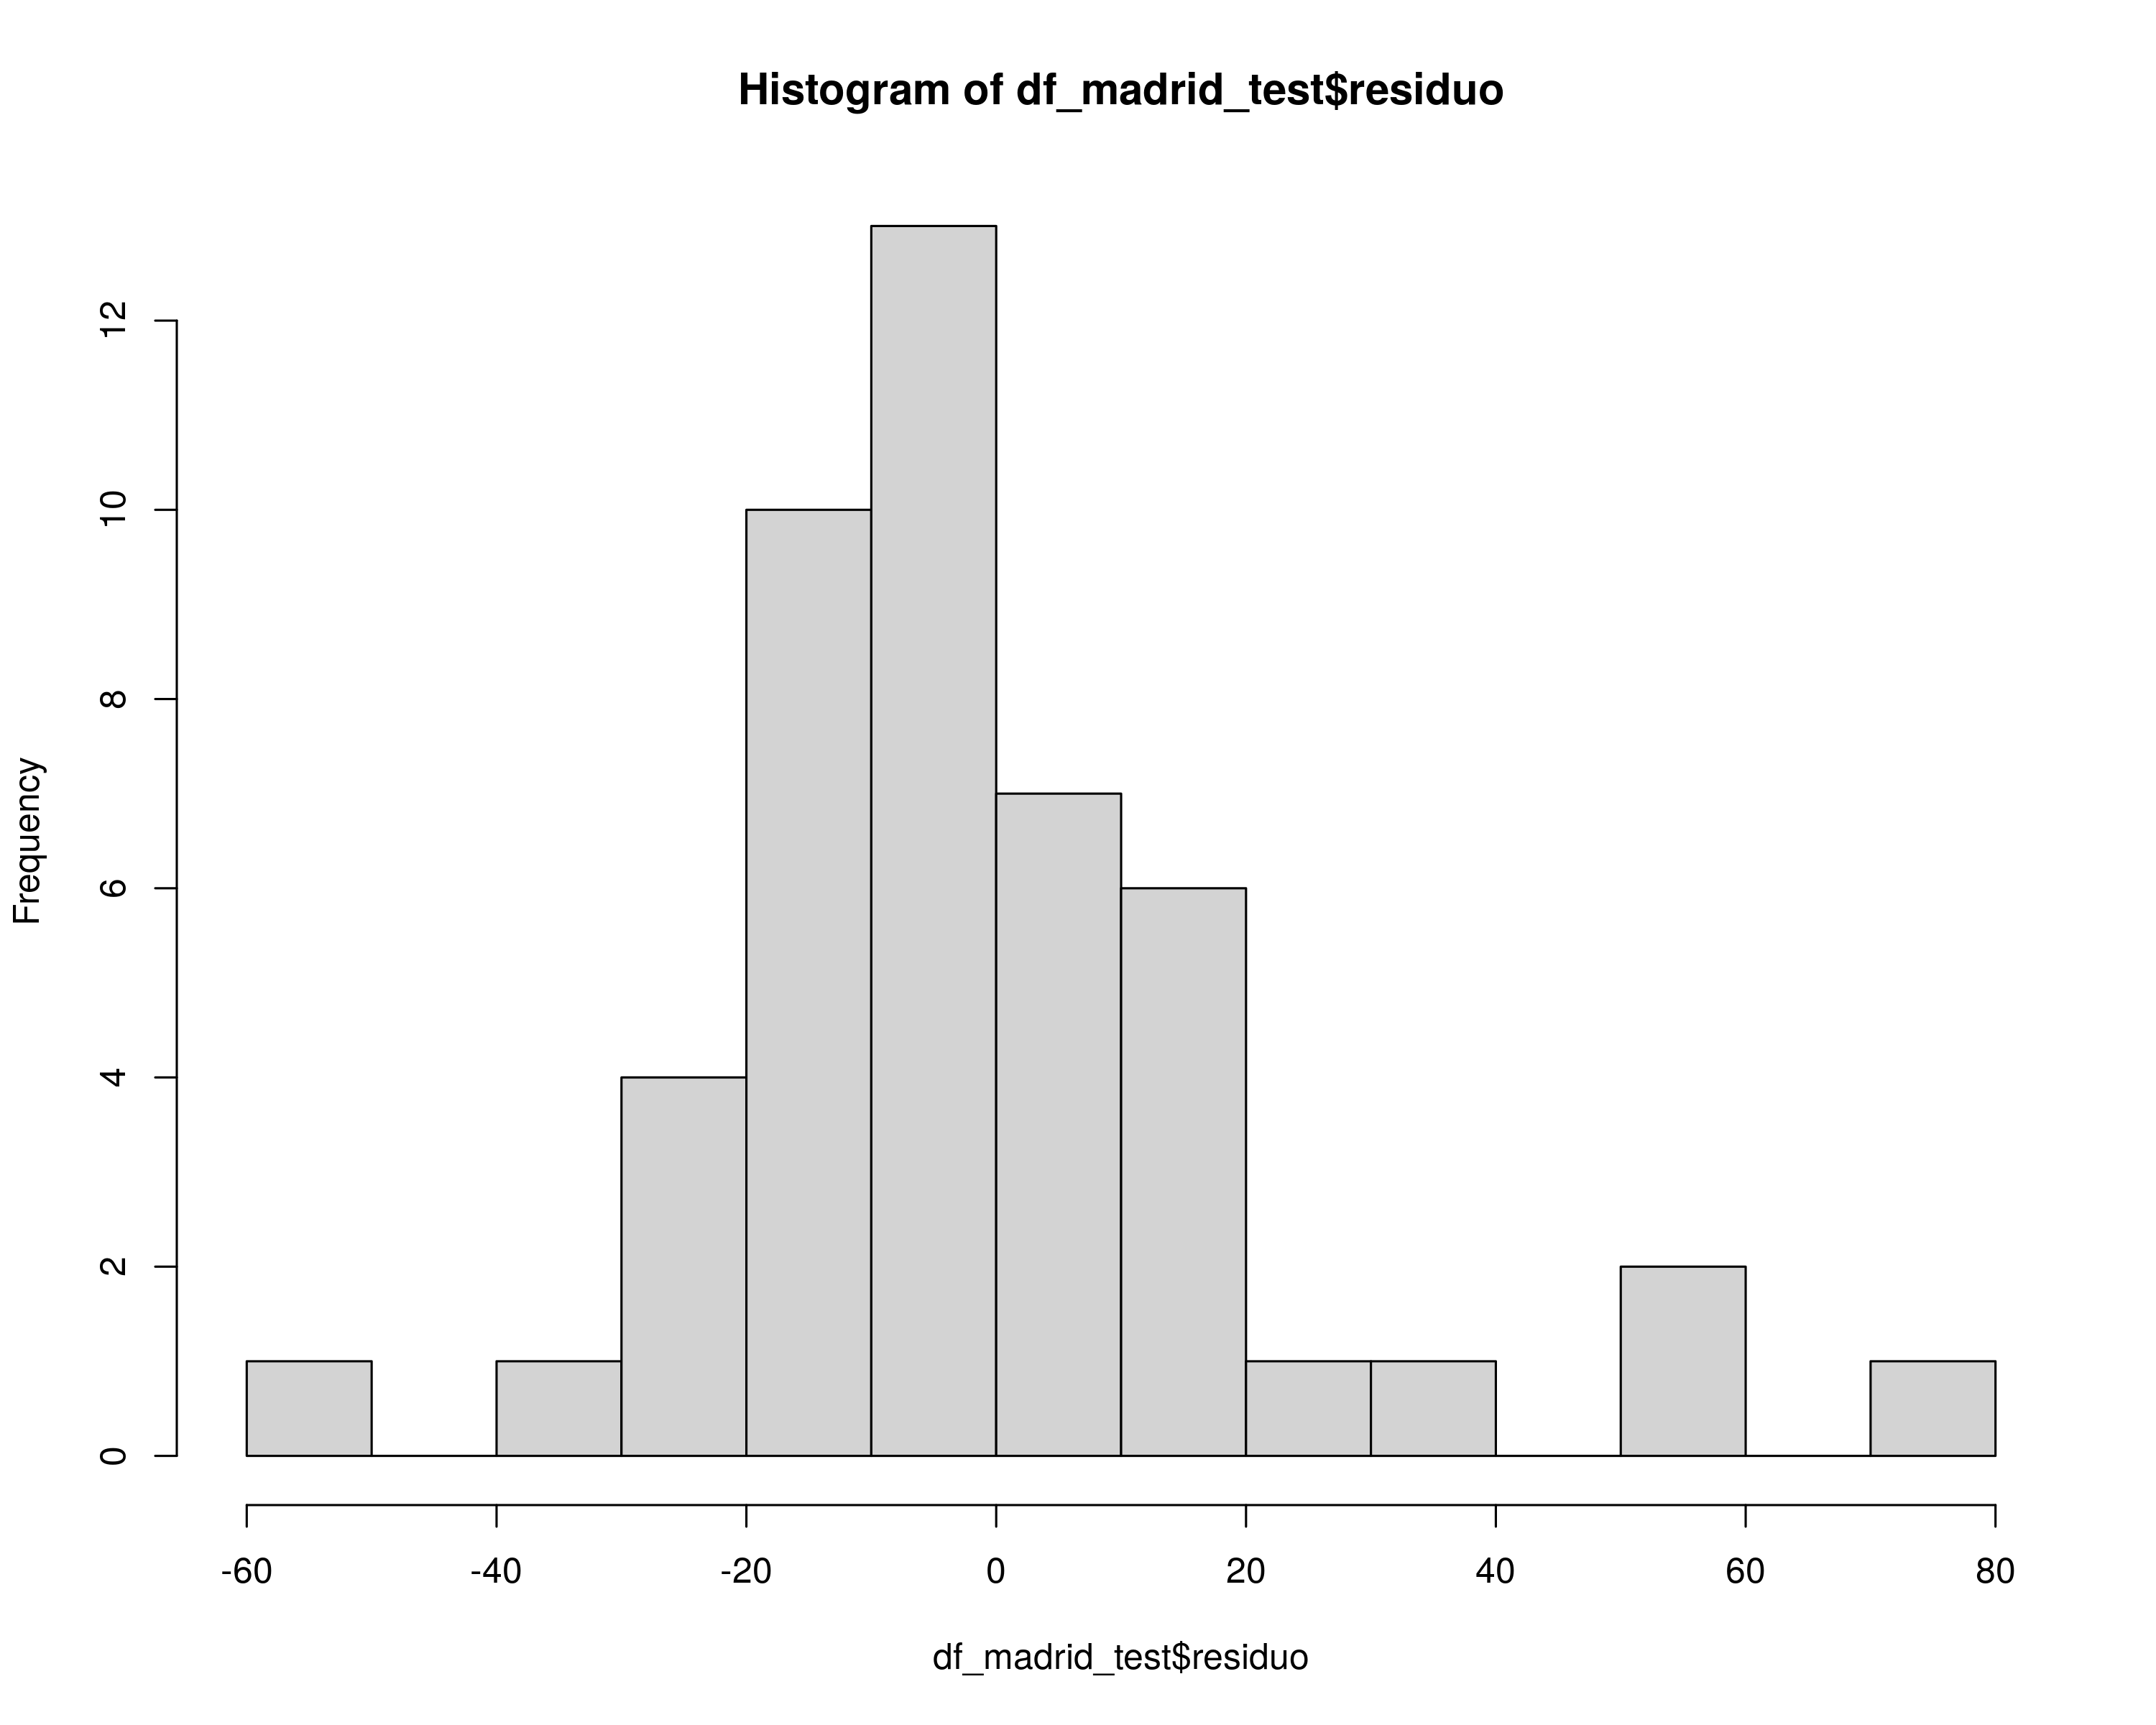

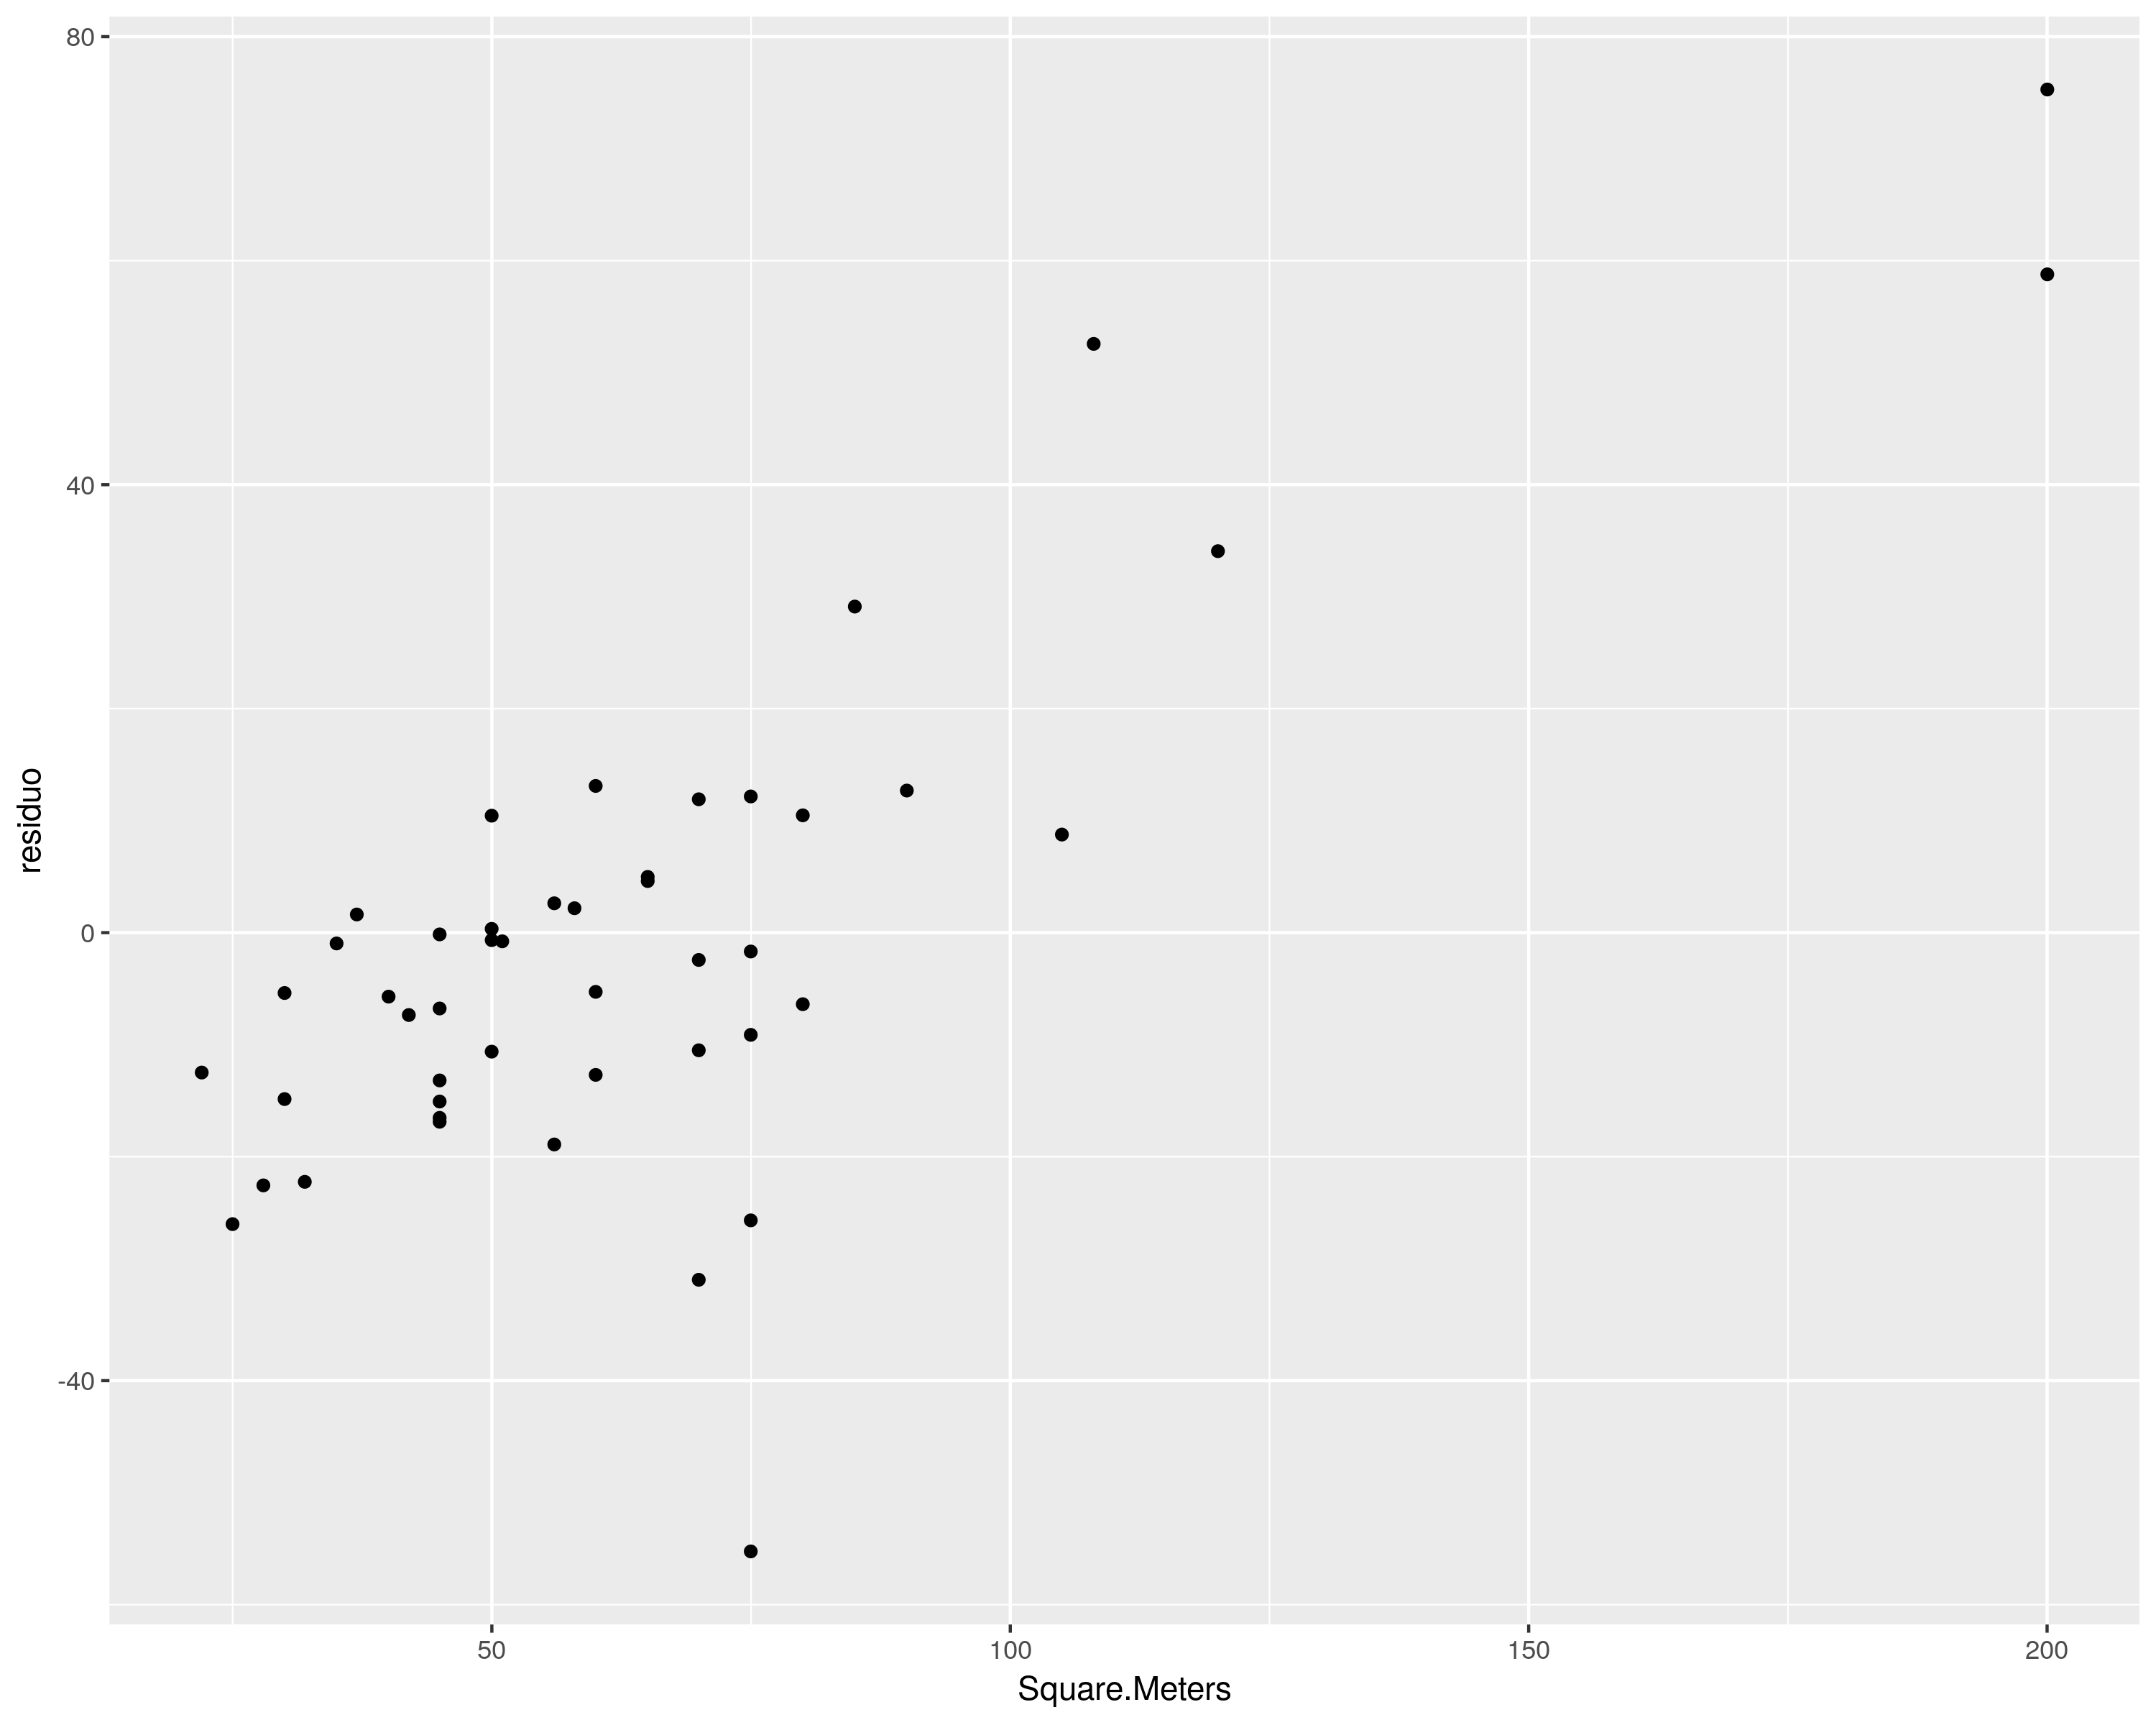

In [33]:
hist(df_madrid_test$residuo,10)
ggplot(df_madrid_test, aes(x=Square.Meters, y=residuo))+geom_point()

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [34]:
unique(df_madrid$neighb_id[df_madrid$Neighbourhood == 'Sol'])

[1] 1
Levels: 1 2 3

In [35]:
df_prediccion <- data.frame(
    "Neighbourhood" = as.character("Sol"),
    "Accommodates"= c(6),
    "Bathrooms" = c(1),
    "Bedrooms" =  c(3,4,5),
    "Beds" = c(3),
    "Price" = c(80),
    "Extra.People" = c(5),
    "Review.Scores.Rating" = c(80),
    "Square.Meters" = NA,
   "neighb_id" = as.factor(c(1))
)
df_prediccion

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra.People,Review.Scores.Rating,Square.Meters,neighb_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<fct>
Sol,6,1,3,3,80,5,80,NA,1
Sol,6,1,4,3,80,5,80,NA,1
Sol,6,1,5,3,80,5,80,NA,1


In [36]:
df_prediccion$pred_Square_Meters <- predict(model, df_prediccion)
df_prediccion

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra.People,Review.Scores.Rating,Square.Meters,neighb_id,pred_Square_Meters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>
Sol,6,1,3,3,80,5,80,NA,1,88.11051
Sol,6,1,4,3,80,5,80,NA,1,104.67422
Sol,6,1,5,3,80,5,80,NA,1,121.23792


In [37]:
print("Con cada habitación adicional, los metros cuadrados aumentan en 16.56370, de acuerdo con lo predicho en el modelo")
summary(model)

[1] "Con cada habitación adicional, los metros cuadrados aumentan en 16.56370, de acuerdo con lo predicho en el modelo"



Call:
lm(formula = Square.Meters ~ log(Bathrooms) + Bedrooms:neighb_id + 
    Price + Extra.People, data = df_madrid_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.656 -10.399   0.052   8.517  45.068 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         32.81560    3.53730   9.277 1.25e-15 ***
log(Bathrooms)      29.57537    6.51258   4.541 1.39e-05 ***
Price                0.04231    0.02733   1.548 0.124390    
Extra.People         0.44377    0.18976   2.339 0.021083 *  
Bedrooms:neighb_id1 16.56370    2.31552   7.153 8.45e-11 ***
Bedrooms:neighb_id2  9.76656    2.47391   3.948 0.000136 ***
Bedrooms:neighb_id3 18.83768    2.83670   6.641 1.08e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.25 on 115 degrees of freedom
  (3308 observations deleted due to missingness)
Multiple R-squared:  0.7724,	Adjusted R-squared:  0.7605 
F-statistic: 65.03 on 6 and 115 DF,  p-value: 

In [38]:
#dataframe de prueba con los datos del dataframe df_madrid_test para verificar funcionamiento anterior
#df_prediccion2 <- data.frame(
#   "Neighbourhood" = as.character(c("Sol", "Cuatro Caminos", "Sol", "Justicia", "Malasaña", "Sol", "Embajadores", "Justicia")),
#  "Accommodates"= c(5,4,4,4,2,4,9,6),
#    "Bathrooms" = c(1,2,1,1,1,1,1.5,1),
#    "Bedrooms" =  c(2,1,1,0,0,1,3,2),
#    "Beds" = c(5,1,1,2,1,2,6,3),
#    "Price" = c(100,46,100,54,75,95,110,90),
#    "Extra.People" = c(5,7,10,10,0,15,50,15),
#    "Review.Scores.Rating" = c(91,93,87,87,67,90,89,95),
#    "Square.Meters" = c(69.95596,56.02051,69.95596,49.98181,35.02443,65.03210,69.95596,74.97272),
#   "neighb_id" = as.factor(c(1,1,1,2,2,1,2,2)))
#df_prediccion2$pred_Square_Meters <- predict(model, df_prediccion2)
#df_prediccion2

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [39]:
df_madrid$pred_Square_Meters <- predict(model, df_madrid)
df_madrid <- df_madrid %>% mutate(Square.Meters = coalesce(Square.Meters,pred_Square_Meters))
#df_madrid %>% filter(Square.Meters == pred_Square_Meters)
#df_madrid %>% filter(Square.Meters != pred_Square_Meters)

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

Standard deviations (1, .., p=12):
 [1] 514.92627432  53.93936274  20.19069553   8.91324041   8.22521265
 [6]   1.96855596   1.00193222   0.72819719   0.46133072   0.34803101
[11]   0.01906354   0.01236845

Rotation (n x k) = (12 x 12):
                              PC1           PC2           PC3           PC4
Accommodates         1.661206e-03  1.395438e-02  3.927108e-02 -0.0229369374
Bathrooms            5.062782e-04  3.422395e-03  1.107377e-02  0.0054826055
Bedrooms             8.330442e-04  7.051760e-03  2.297966e-02  0.0011483096
Beds                 1.407996e-03  1.133260e-02  3.098708e-02 -0.0275405296
Price                4.671973e-02  9.778317e-01 -2.033282e-01 -0.0121125839
Square.Feet          9.982943e-01 -5.286149e-02 -2.470489e-02 -0.0009950040
Guests.Included      6.293447e-04  7.553520e-03  1.389416e-02 -0.0172102631
Extra.People         3.098826e-03  1.524686e-02  1.396373e-01 -0.9825711271
Review.Scores.Rating 1.745419e-03  6.520124e-03 -5.148914e-03 -0.1140422908
Lat

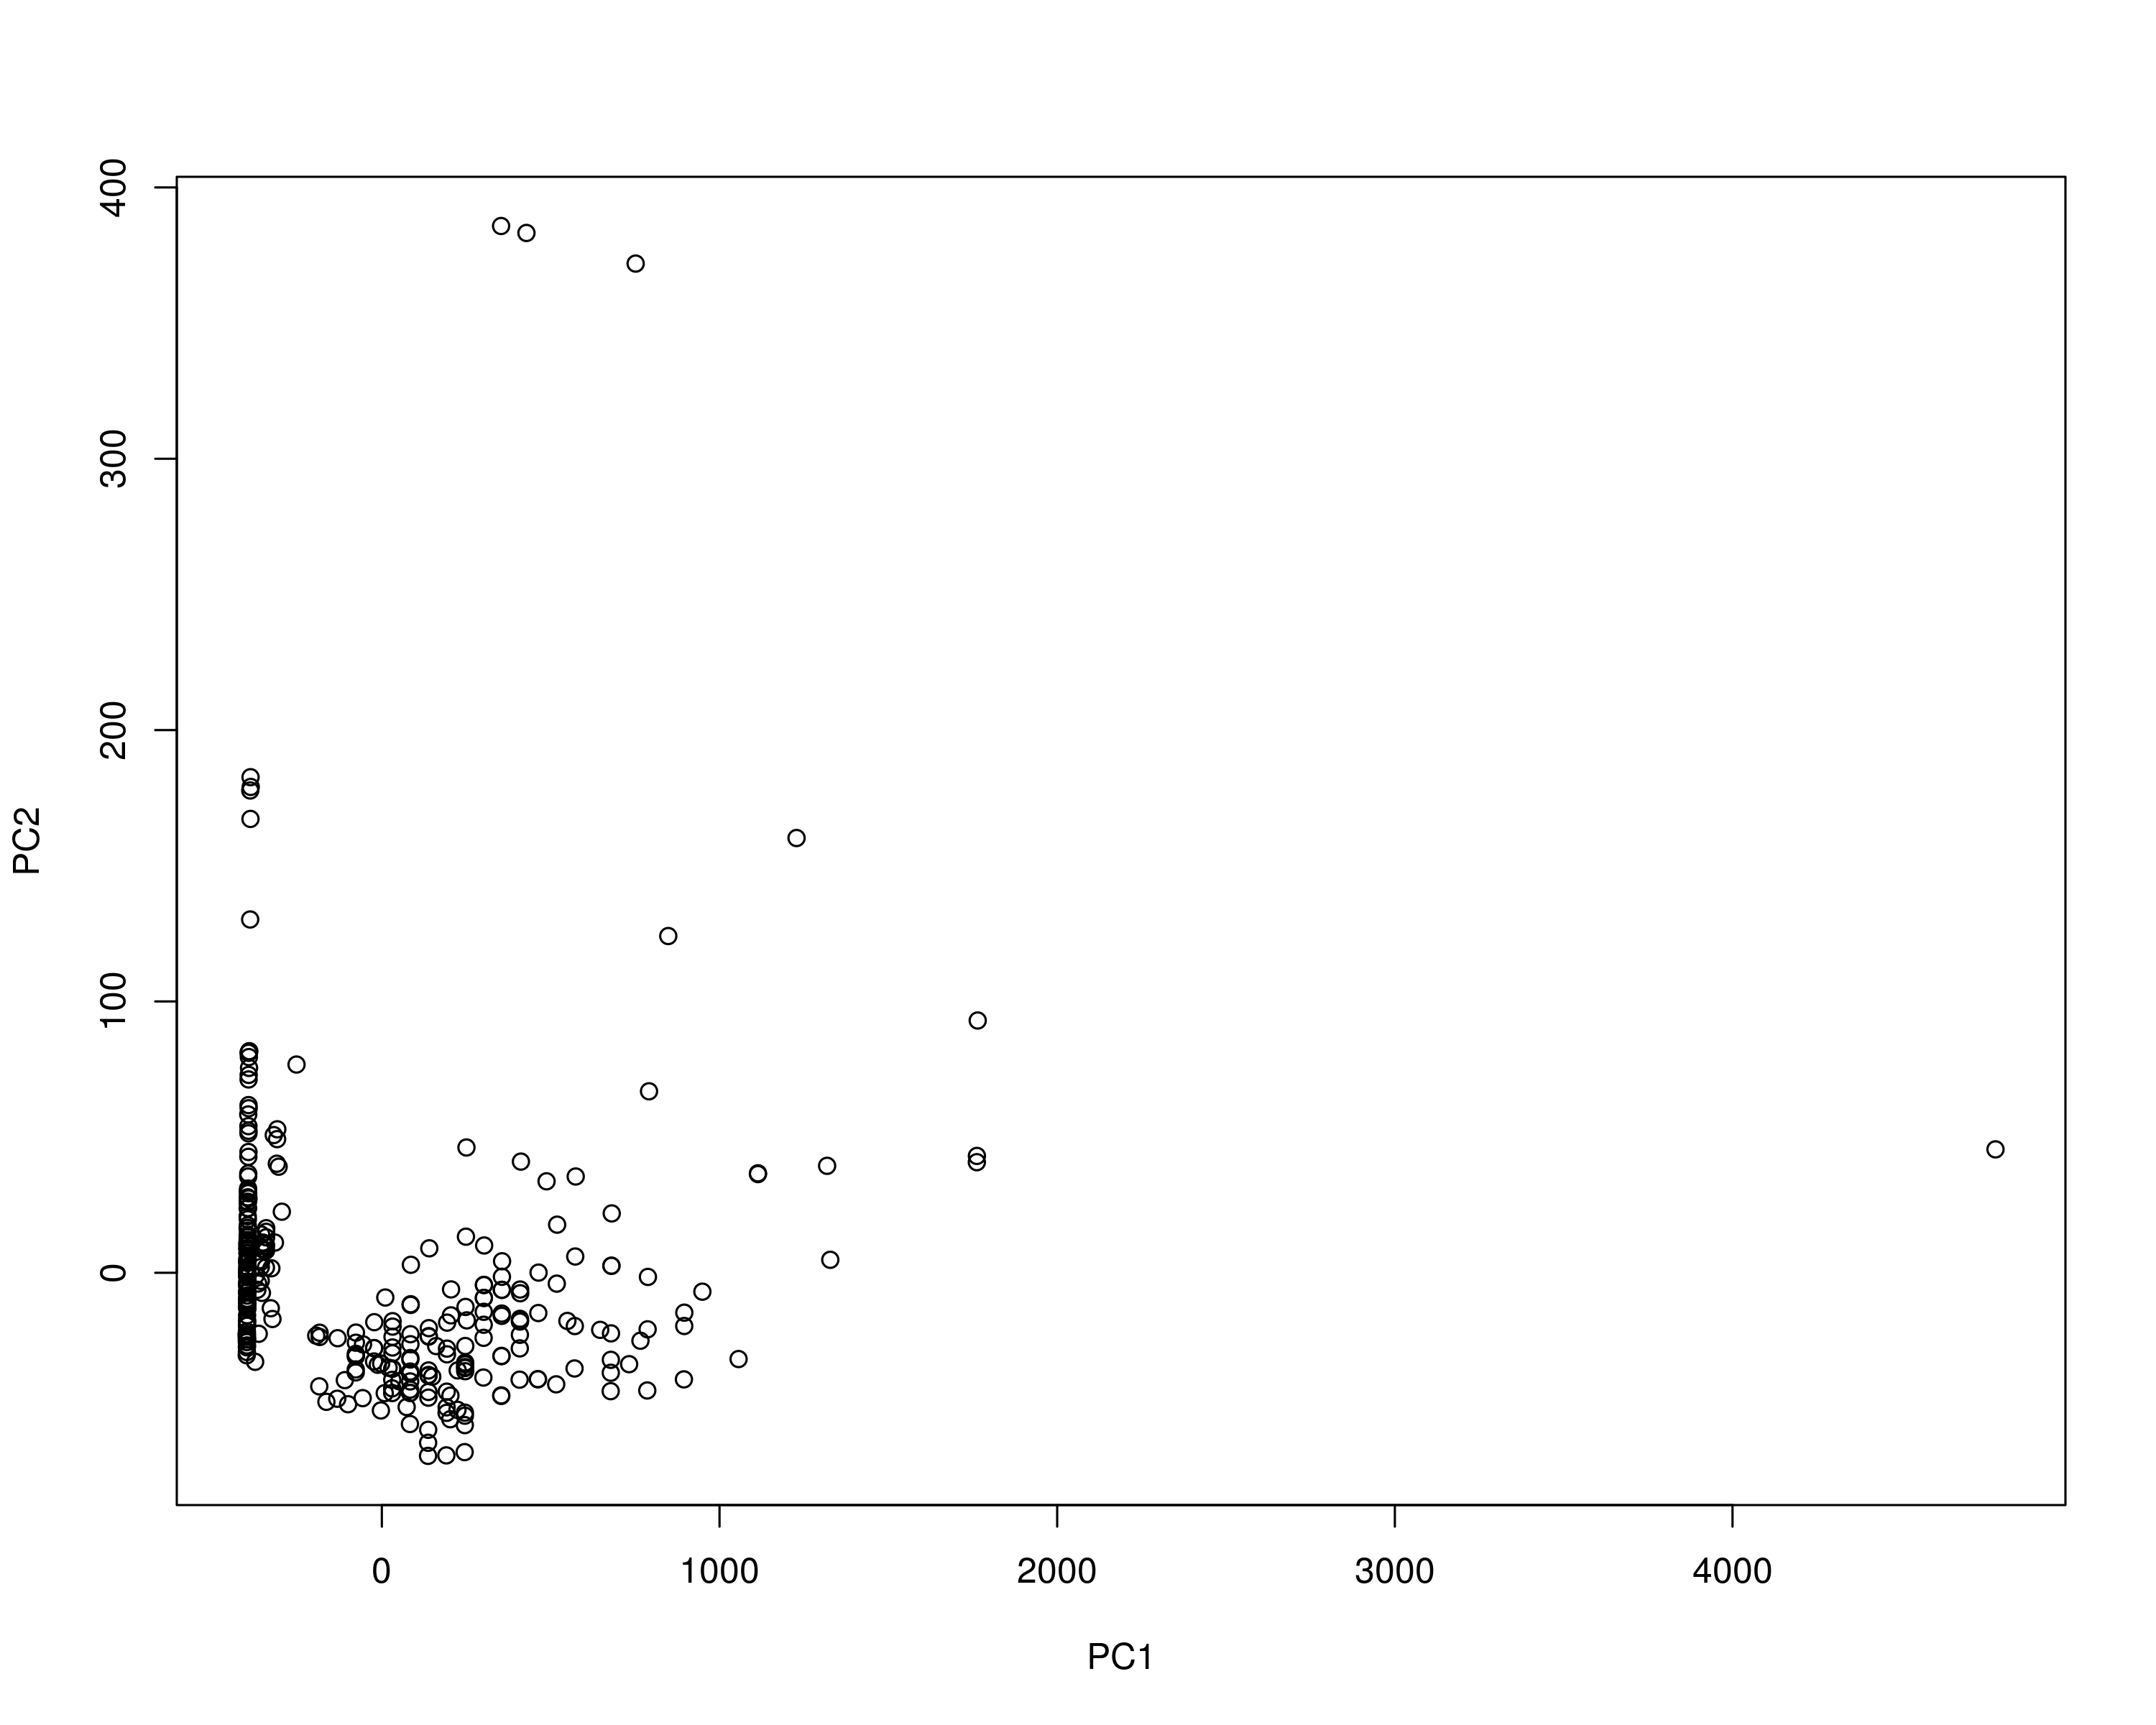

In [40]:
pr_df_madrid <- prcomp(na.omit(df_madrid[,2:13], center = TRUE, scale = TRUE))
pr_df_madrid
plot(pr_df_madrid$x[,1:12])

In [41]:
# Matriz de autovalores
pr_df_madrid$sdev[1:12]

[1] 514.92627432  53.93936274  20.19069553   8.91324041   8.22521265
 [6]   1.96855596   1.00193222   0.72819719   0.46133072   0.34803101
[11]   0.01906354   0.01236845

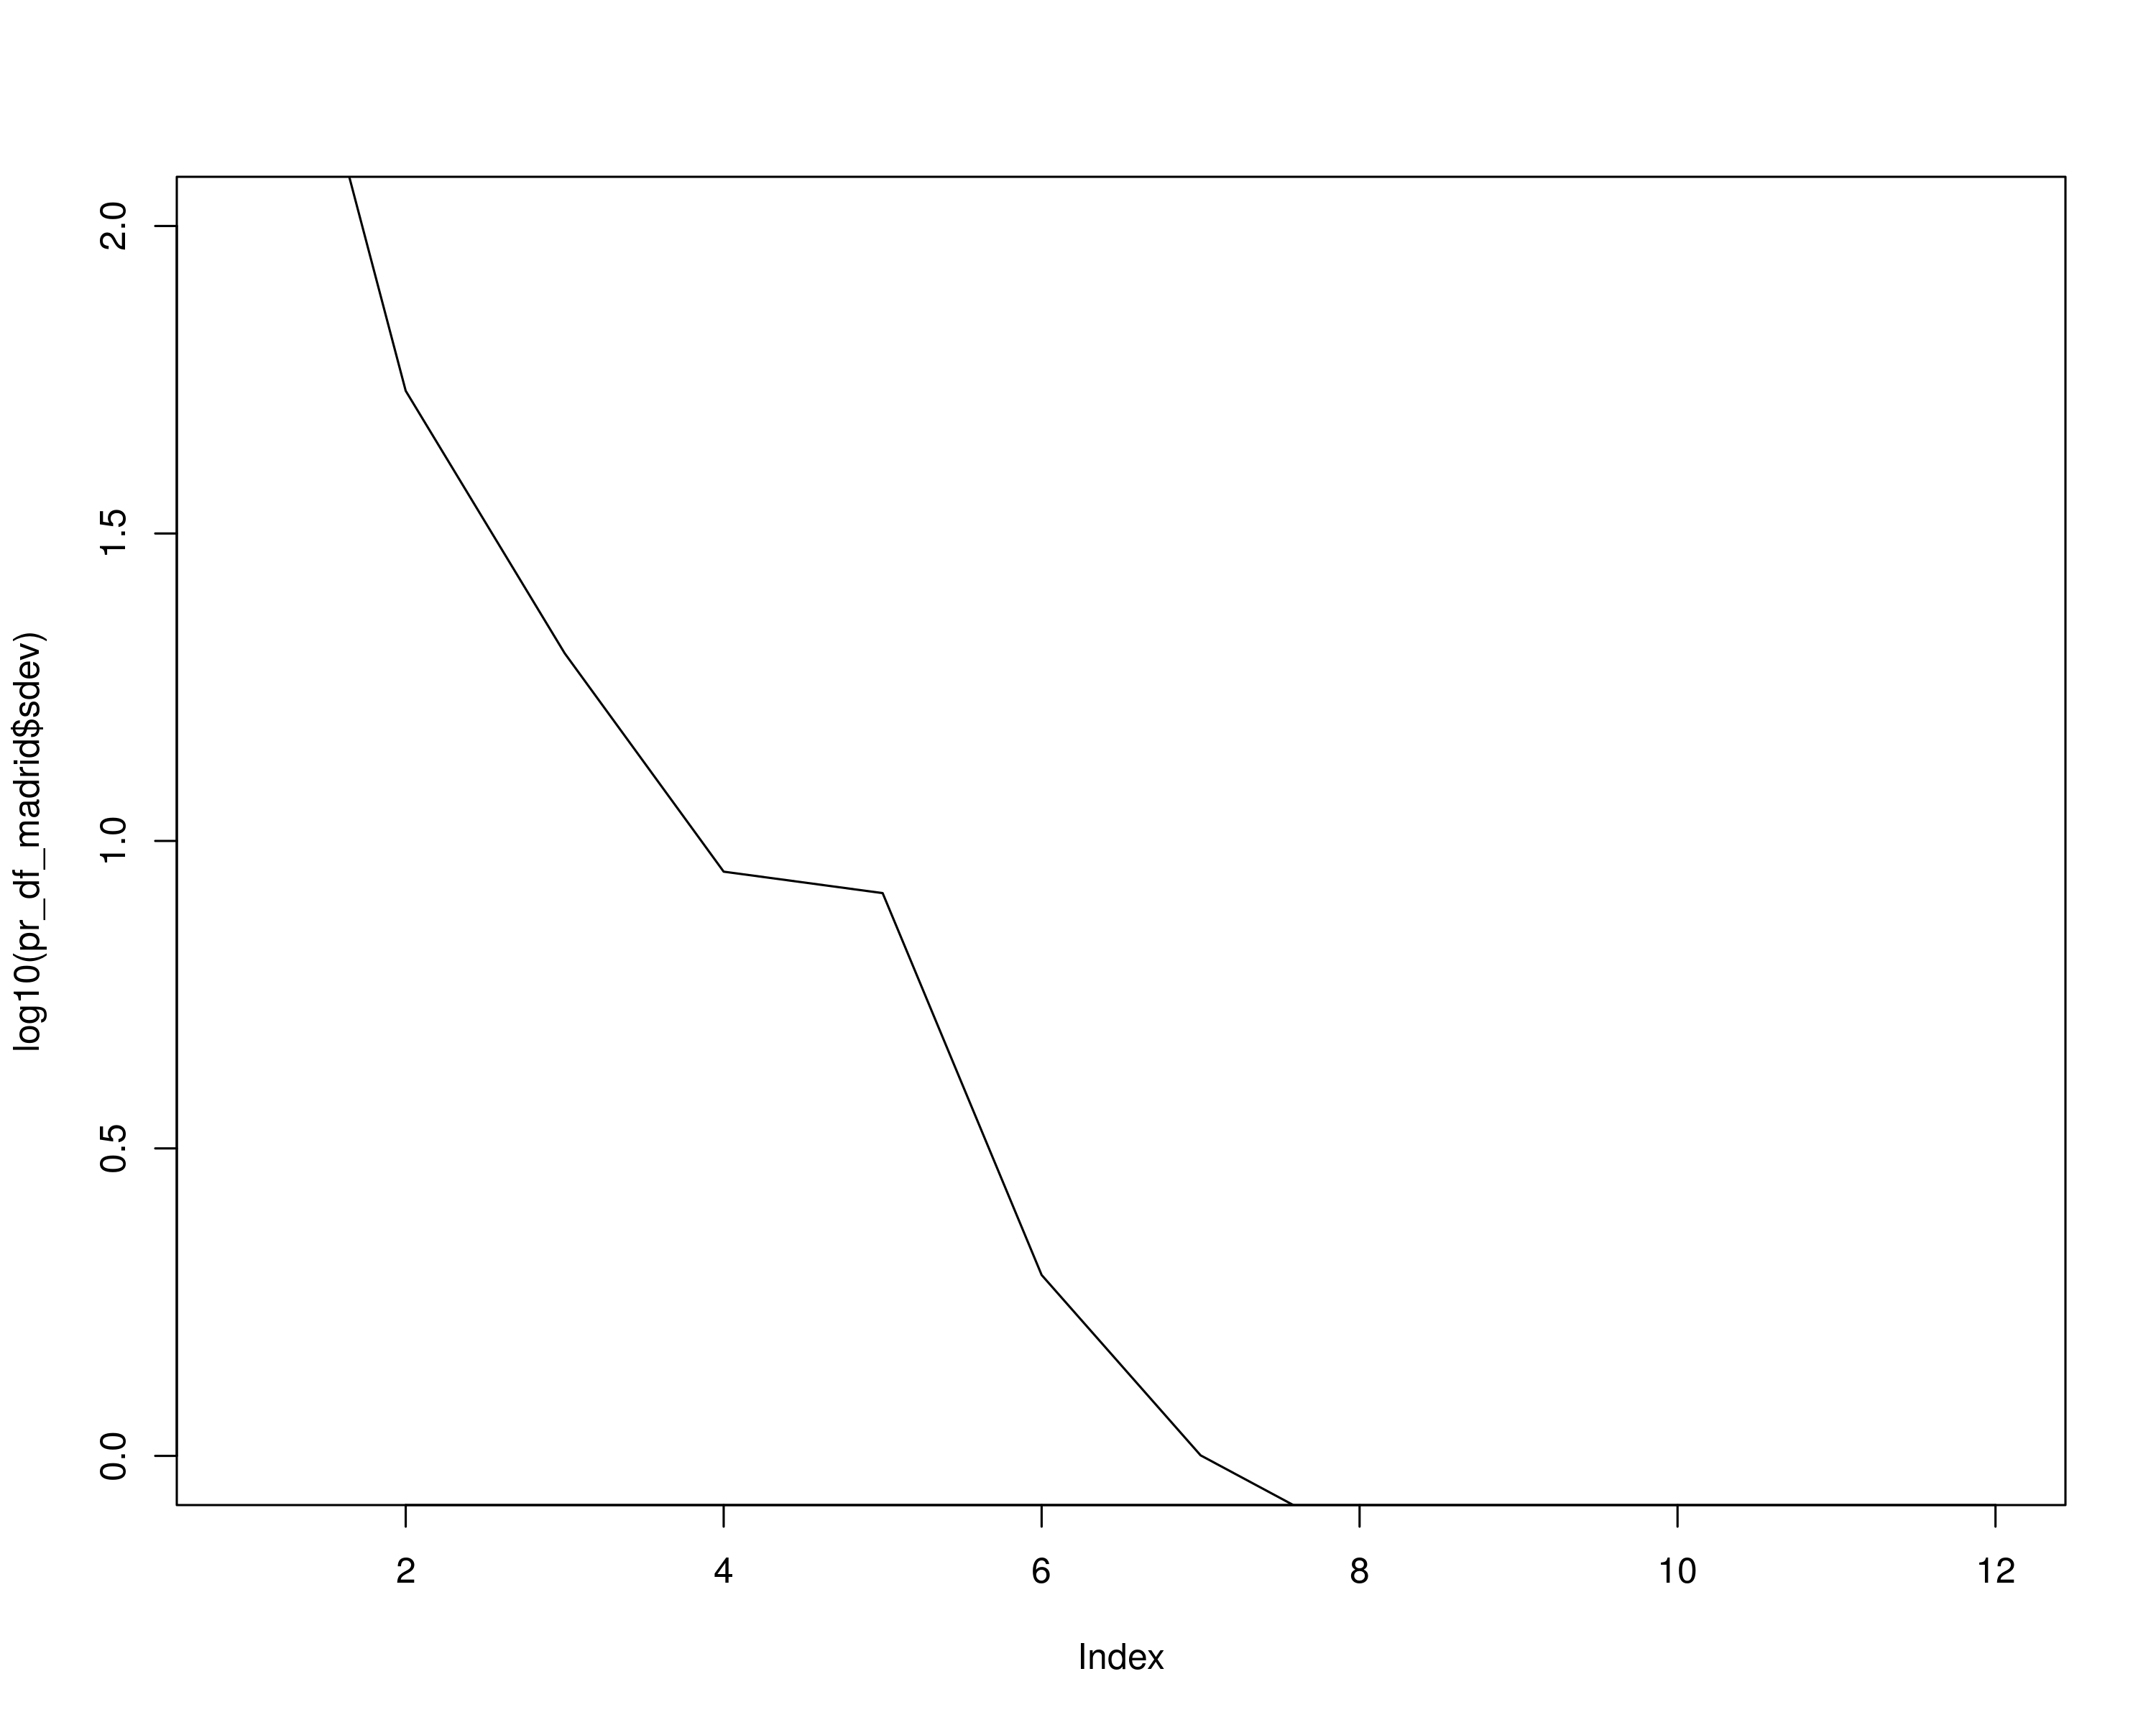

In [42]:
plot(log10(pr_df_madrid$sdev),t='l',ylim = c(0,2))

In [43]:
# Matriz de autovectores
pr_df_madrid$rotation[sample(1:nrow(pr_df_madrid$rotation),12),1:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Longitude,3.750747e-06,-1.983613e-05,6.999315e-05,0.0001815129,6.784993e-06,-1.045947e-04,2.429545e-03,-2.062439e-03,0.0014316362,-3.358276e-03,8.702585e-01,-4.925714e-01
Latitude,2.493930e-06,1.735243e-07,2.594760e-05,0.0003576989,2.230959e-04,1.757810e-04,1.706657e-03,1.799779e-03,-0.0054718946,-4.347375e-03,4.925573e-01,8.702483e-01
Price,4.671973e-02,9.778317e-01,-2.033282e-01,-0.0121125839,8.620247e-03,9.363167e-03,-3.240132e-03,-3.298366e-04,-0.0007052758,5.294294e-04,4.559621e-05,-1.394953e-05
Guests.Included,6.293447e-04,7.553520e-03,1.389416e-02,-0.0172102631,1.882979e-02,-2.055207e-01,9.672619e-01,-1.110209e-01,-0.0161658606,9.311856e-02,-2.509283e-03,1.598120e-04
Beds,1.407996e-03,1.133260e-02,3.098708e-02,-0.0275405296,7.568776e-03,-6.683634e-01,-2.263229e-01,-7.048526e-01,-0.0562136310,1.347899e-02,1.859160e-05,1.748373e-03
Bedrooms,8.330442e-04,7.051760e-03,2.297966e-02,0.0011483096,2.093288e-03,-1.617753e-01,-2.122308e-03,7.549393e-02,0.9804466465,-7.898485e-02,1.093072e-03,5.030556e-03
Square.Feet,9.982943e-01,-5.286149e-02,-2.470489e-02,-0.0009950040,1.650121e-03,4.774066e-05,7.987912e-05,3.536871e-05,0.0001178430,4.776988e-05,-3.222002e-06,4.360254e-07
Bathrooms,5.062782e-04,3.422395e-03,1.107377e-02,0.0054826055,4.299138e-03,-3.724179e-02,8.550208e-02,-3.892551e-03,-0.0858418026,-9.918162e-01,-5.406564e-03,-2.590126e-03
Extra.People,3.098826e-03,1.524686e-02,1.396373e-01,-0.9825711271,1.106867e-01,4.880072e-02,-1.039819e-02,2.525106e-03,0.0048397636,-6.498291e-03,3.128271e-04,1.975383e-04
Square.Meters,3.474100e-02,2.008338e-01,9.670450e-01,0.1406709491,-2.147879e-02,5.146444e-02,-3.655639e-03,-6.178998e-03,-0.0143949199,1.121555e-02,-7.114302e-05,-6.595129e-05


In [44]:
#Matrix de componentes principales
dim(pr_df_madrid$x)

[1] 319  12

In [45]:
pr_df_madrid$x[1,1:12]

PC1           PC2           PC3           PC4           PC5 
-3.981633e+02  4.959514e+00 -2.537312e+00  6.397941e-01  6.250603e+00 
          PC6           PC7           PC8           PC9          PC10 
 5.892401e-01  7.046664e-02 -6.367815e-01  9.532865e-03  5.311639e-02 
         PC11          PC12 
-7.580253e-03 -3.478928e-03

In [46]:
#na.omit(predict(pr_df_madrid, df_madrid))

In [47]:
df_prediccion2 <- data.frame(
    "Accommodates"= c(6),
    "Bathrooms" = 2,
    "Bedrooms" =  c(3),
    "Beds" = 4,
    "Square.Feet" = 861.11,
    "Price" = 120,
    "Guests.Included" = 6,
    "Extra.People" = 3,
    "Review.Scores.Rating" = 80,
    "Latitude" = 40.41200,
    "Longitude" = -3.717843,
    "Square.Meters" = 80
)
df_prediccion2

Accommodates,Bathrooms,Bedrooms,Beds,Square.Feet,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2,3,4,861.11,120,6,3,80,40.412,-3.717843,80


In [48]:
predict_new_flat <- predict(pr_df_madrid, df_prediccion2)
predict_new_flat
dim(predict_new_flat)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
464.6199,9.518933,-4.237112,9.545882,9.930035,-2.186897,3.179753,-0.4956732,0.8264122,-0.1516211,-0.03551669,0.002820174


[1]  1 12

In [49]:
number_of_pca_components<-4

In [50]:
Apc<-pr_df_madrid$x[,1:number_of_pca_components]

In [51]:
dist<-rep(NA,nrow(Apc))
for (i in 1:nrow(Apc)){
    dist[i]<-sum((predict_new_flat-Apc[i,])^2)
}

In [52]:
which.min(dist)

[1] 230

In [53]:
order(dist)[1:5]

[1] 230 203 275 164  11

In [54]:
print("Los 5 apartamentos más similares al nuestro son: ")
df_madrid[order(dist)[1:5],]

[1] "Los 5 apartamentos más similares al nuestro son: "


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,pred_Square_Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Embajadores,4,1,1,2,80,NA,1,0,98,40.41027,-3.701962,45.96710,2,45.96710
Usera,4,1,2,3,50,NA,1,0,96,40.37016,-3.688911,68.05859,1,68.05859
La Latina,4,1,1,2,50,NA,2,15,92,40.40800,-3.709351,51.35437,2,51.35437
Rios Rosas,2,1,1,2,57,NA,2,10,98,40.44081,-3.694174,58.50279,3,58.50279
Embajadores,7,2,3,5,160,NA,1,0,100,40.41050,-3.698388,89.38525,2,89.38525


In [55]:
df_madrid[230,]
df_madrid[203,]
df_madrid[275,]
df_madrid[164,]
df_madrid[11,]

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,pred_Square_Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Embajadores,4,1,1,2,80,NA,1,0,98,40.41027,-3.701962,45.9671,2,45.9671


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,pred_Square_Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Usera,4,1,2,3,50,NA,1,0,96,40.37016,-3.688911,68.05859,1,68.05859


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,pred_Square_Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
La Latina,4,1,1,2,50,NA,2,15,92,40.408,-3.709351,51.35437,2,51.35437


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,pred_Square_Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Rios Rosas,2,1,1,2,57,NA,2,10,98,40.44081,-3.694174,58.50279,3,58.50279


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,pred_Square_Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Embajadores,7,2,3,5,160,NA,1,0,100,40.4105,-3.698388,89.38525,2,89.38525


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?